In [101]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-2.0.1-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.1-py3-none-win_amd64.whl (99.7 MB)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#pd.set_option('display.max_columns', None)
df_16082023 = pd.read_csv('df_2023-08-16.csv', parse_dates=['date_utc'])
df_17082023 = pd.read_csv('df_2023-08-17.csv', parse_dates=['date_utc'])
df_18082023 = pd.read_csv('df_2023-08-18.csv', parse_dates=['date_utc'])

df = pd.concat([df_16082023, df_17082023, df_18082023], ignore_index=True)
df

trace_time        cookie_value                       query  \
0       1692216825804  01j4xv1o00lk2gkf1r                    tk-5240k   
1       1692211903439  01na5ol400liq9p3zz             synology ds223j   
2       1692211507151  0113m0ic00ky1rmiyw               familyfix 360   
3       1692183090078  01fhyzxc00lldl7p0c                        snup   
4       1692220521164  01hn0h0000lle7vnfx                  air pods 3   
...               ...                 ...                         ...   
725284  1692377985834  01yj0h0000llgu1mjo  samsung galaxy tab s8 plus   
725285  1692377985834  01yj0h0000llgu1mjo  samsung galaxy tab s8 plus   
725286  1692397950145  01s1meel00l94omjko                      rimowa   
725287  1692397950145  01s1meel00l94omjko                      rimowa   
725288  1692385977201  010dg9kz00ljtlr52c                  keeper 785   

        results  topcategory                   id   price  totalprice  \
0          1377         4995  3509604132933600003    5451        5451   
1           102         9272  3548574108113437554   49090       49639   
2           110        15592  3530515860405879623   38899       39098   
3            64        14173  3470293304510251280     385         385   
4         59498         2520              6837655    8799        8799   
...         ...          ...                  ...     ...         ...   
725284    13181         3747            201871702   87900       87900   
725285    13181         3747            202656676    1299        1299   
725286      110         9113              6319428  118000      118000   
725287      110         9113  3503362884648304699  114000      114000   
725288       19         9432              5481472    3995        3995   

        popularity  categoryid  manuid    shopid  availability  rating  \
0                0        4995       0    5300.0             0    -1.0   
1                0        3751   33280  301558.0             3    -1.0   
2               44        5852   16600  318806.0             1    -1.0   
3                0       14173       0   12041.0             0    -1.0   
4             3823        2520   11880      -1.0             1   450.0   
...            ...         ...     ...       ...           ...     ...   
725284          27        3747    1049      -1.0             0    -1.0   
725285           0       22506  169110      -1.0             0    -1.0   
725286          15        9113    2639      -1.0             1    -1.0   
725287           6       22655    2639  223186.0             1    -1.0   
725288         485        9432   34900      -1.0             0    -1.0   

         tests  numratings  discount  shorttermbargain  bargain  productscore  \
0         -1.0         0.0       0.0                 0        0          -1.0   
1         -1.0         0.0       0.0                 0        0          -1.0   
2         -1.0         0.0       0.0                 0        0          -1.0   
3         -1.0         0.0       0.0                 0        0          -1.0   
4       8798.0        77.0      59.0                 1        1          54.0   
...        ...         ...       ...               ...      ...           ...   
725284    -1.0         0.0       0.0                 0        0          50.0   
725285    -1.0         0.0       0.0                 0        0          32.0   
725286    -1.0         0.0       0.0                 0        0          23.0   
725287    -1.0         0.0       0.0                 0        0          -1.0   
725288    -1.0         0.0       0.0                 0        0          30.0   

         listedsince  relevance_score  text_relevance  itemtype   date_utc  \
0                NaN            28350            37.5         0 2023-08-16   
1                NaN            79380           105.0         0 2023-08-16   
2                NaN            45390            50.0         0 2023-08-16   
3                NaN            13230            25.0         0 2023-08-16   
4    

In [6]:
df.columns

Index(['trace_time', 'cookie_value', 'query', 'results', 'topcategory', 'id',
       'price', 'totalprice', 'popularity', 'categoryid', 'manuid', 'shopid',
       'availability', 'rating', 'tests', 'numratings', 'discount',
       'shorttermbargain', 'bargain', 'productscore', 'listedsince',
       'relevance_score', 'text_relevance', 'itemtype', 'date_utc',
       'prev_clicks', 'prev_impressions', 'clicks', 'impressions',
       'relevance_label'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725289 entries, 0 to 725288
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   trace_time        725289 non-null  int64         
 1   cookie_value      725289 non-null  object        
 2   query             725289 non-null  object        
 3   results           725289 non-null  int64         
 4   topcategory       725289 non-null  int64         
 5   id                725289 non-null  int64         
 6   price             725289 non-null  int64         
 7   totalprice        725289 non-null  int64         
 8   popularity        725289 non-null  int64         
 9   categoryid        725289 non-null  int64         
 10  manuid            725289 non-null  int64         
 11  shopid            725289 non-null  float64       
 12  availability      725289 non-null  int64         
 13  rating            725289 non-null  float64       
 14  test

In [4]:
df.describe()

trace_time       results    topcategory            id         price  \
count  2.446650e+05  2.446650e+05  244665.000000  2.446650e+05  2.446650e+05   
mean   1.692208e+12  1.419340e+05   13545.157538  1.531747e+18  6.733215e+04   
std    1.595581e+07  4.924280e+05    9435.832056  1.737305e+18  5.382068e+06   
min    1.692144e+12  1.000000e+00    1002.000000  1.532200e+04 -1.000000e+00   
25%    1.692198e+12  1.450000e+02    3747.000000  2.017397e+08  1.785000e+03   
50%    1.692213e+12  8.960000e+02   12093.000000  2.027928e+08  6.256000e+03   
75%    1.692220e+12  1.250000e+04   19116.000000  3.514071e+18  3.598000e+04   
max    1.692230e+12  9.209198e+06   32699.000000  3.548841e+18  1.190000e+09   

         totalprice     popularity     categoryid         manuid  \
count  2.446650e+05  244665.000000  244665.000000  244665.000000   
mean   6.753457e+04     142.163387   13960.142149   51141.304531   
std    5.382066e+06     942.329565    9000.259125   62197.282621   
min   -1.000000e+00       0.000000    1000.000000       0.000000   
25%    1.999000e+03       0.000000    5314.000000    1049.000000   
50%    6.490000e+03       2.000000   13594.000000   14780.000000   
75%    3.615000e+04      22.000000   19116.000000  116377.000000   
max    1.190000e+09   23449.000000   32719.000000  172976.000000   

              shopid  ...   productscore   listedsince  relevance_score  \
count  244665.000000  ...  244665.000000  1.370400e+05     2.446650e+05   
mean    50162.294521  ...      21.646987  1.614660e+12     1.144866e+05   
std    108679.657711  ...      22.158410  9.821618e+10     1.979477e+05   
min        -1.000000  ...      -1.000000  9.923832e+11     1.000000e+01   
25%        -1.000000  ...      -1.000000  1.600639e+12     4.260000e+04   
50%        -1.000000  ...      25.000000  1.646780e+12     7.085000e+04   
75%     12041.000000  ...      41.000000  1.675724e+12     1.061500e+05   
max    329958.000000  ...      74.000000  1.692137e+12     5.081960e+06   

       text_relevance       itemtype    prev_clicks  prev_impressions  \
count   244665.000000  244665.000000  243611.000000     243611.000000   
mean       138.037345       1.599317       3.323631        305.834310   
std        229.154283       1.441563      34.804402        802.845717   
min          0.100000       0.000000       0.000000          0.000000   
25%         55.000000       0.000000       0.000000         79.000000   
50%         75.200000       2.000000       0.000000        145.000000   
75%        105.000000       3.000000       0.000000        277.000000   
max       8350.000000       3.000000    6199.000000      23761.000000   

              clicks    impressions  relevance_label  
count  243611.000000  243611.000000    225790.000000  
mean        0.119818      12.146147         0.141313  
std         1.251866      29.435792         0.676831  
min         0.000000       0.000000         0.000000  
25%         0.000000       3.000000         0.000000  
50%         0.000000       6.000000         0.000000  
75%         0.000000      11.000000         0.000000  
max       207.000000     720.000000         4.000000  

[8 rows x 27 columns]

In [52]:
#query_df = 
df['query'].value_counts()
#.rename_axis('unique_values').reset_index(name='counts')
#query_df.plot(kind='bar',alpha=0.75)
#plt.xlabel("")
#plt.xticks(rotation=90)

query
versace blue jeans              360
fritz 200                       360
gigabyte z790 aorus elite ax    360
asus zenfone 10                 300
redmi 12                        300
                               ... 
4210201412779                     1
hp457dwex4                        1
4000420866558                     1
4066052181902                     1
4000420866688                     1
Name: count, Length: 5476, dtype: int64

<Axes: xlabel='query'>

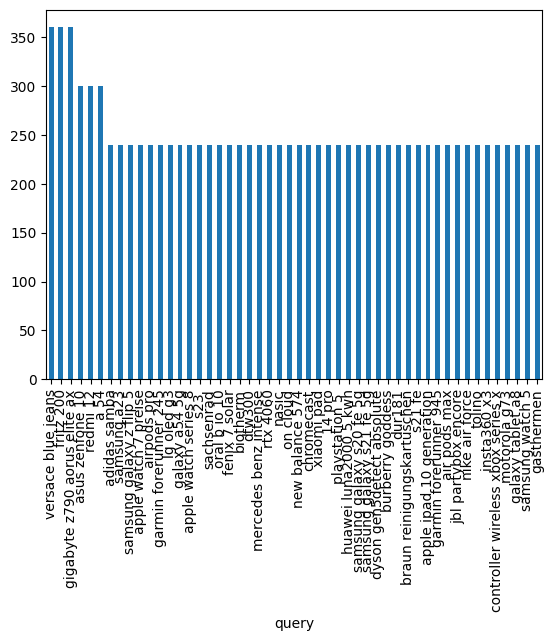

In [53]:
df['query'].value_counts().head(50).plot(kind='bar')

In [21]:
df['price'].value_counts()

price
999       2473
1499      1870
699       1782
1999      1745
799       1671
          ... 
5828         1
158200       1
20936        1
388611       1
320015       1
Name: count, Length: 26355, dtype: int64

In [14]:
df['price'].value_counts().head(50)

price
999       2473
1499      1870
699       1782
1999      1745
799       1671
899       1557
1299      1379
499       1167
2999      1150
1599      1110
1399       960
749        945
1699       942
599        907
2499       882
1799       873
1199       861
1099       810
1490       769
3999       757
1899       679
4999       630
1990       626
1290       623
2990       610
3990       583
1495       574
2199       538
2299       536
1995       535
990        526
3499       517
1690       480
5999       462
99900      457
849        455
2399       452
119900     438
49900      434
2899       434
399        428
33900      424
59900      417
1190       407
27900      398
79900      393
4990       388
6999       379
2599       378
2699       378
Name: count, dtype: int64

<Axes: ylabel='count'>

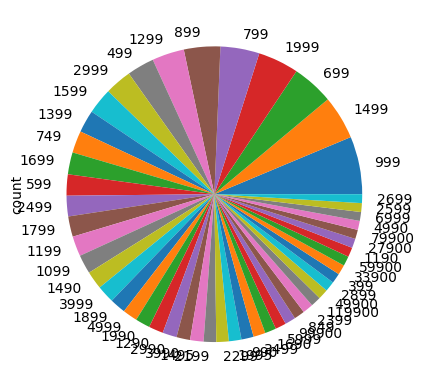

In [15]:
df['price'].value_counts().head(50).plot(kind='pie')

In [35]:
pd.set_option('display.max_rows', None)

df[['cookie_value', 'query']].value_counts().head(100)

cookie_value        query                               
01442sb34dl0xq74jz  versace blue jeans                      240
                    mercedes benz intense                   240
                    prada l'homme                           136
011y0h0000lldwv1kv  dyson gen5detect absolute               120
01dwd5oq00lldkru9u  sachsenrad                              120
01hidcjb00lldl1kib  galaxy a54 5g                           120
012q0h0000l8vqycfe  garmin forerunner 945                   120
01w00h0000liqdis3n  s20 fe                                  120
01020h0000ll9jjjci  s21 fe                                  120
01rlyl9q00lk00n9ml  redmi 12                                120
01mh34lo00lle5o7a8  burberry goddess                        120
01of3xh300ll9u2z67  samsung galaxy s20 fe 5g                120
01mupec800liy7d3h4  garmin forerunner 245                   120
01xtrv9600libxbh1w  samsung galaxy tab s8 plus              120
01ulufeb00ll82g69l  nike air force             

In [22]:
df['popularity'].value_counts()

popularity
0       96276
1       23474
2       12632
3        8714
4        6550
        ...  
1209        1
787         1
1038        1
963         1
1381        1
Name: count, Length: 1279, dtype: int64

In [28]:
df[['query', 'popularity']].sort_values('popularity', ascending=False).head(100)

query  popularity
46107                     iphone 14        23449
128932                      iphone 6       23449
97884               iphone iphone 14       23449
52050         iphone 14 128 gb preis       23449
80578      apple iphone 14 pro 256gb       23449
63358                  iphone 14 pro       23449
99742            iphone 14 pro 256gb       23449
162357      iphone 14 pro max 256 gb       23449
226947                      iphone14       23449
28787                   iphone14 pro       23449
12531            apple iphone 13 pro       23449
81223        iphone 14 pro max 128gb       23449
227640                   pixel 6 pro       23449
210664               apple iphone 10       23449
46192              iphone 14 pro 128       23449
155377             iphone 14 pro max       23449
151652       iphone 14 pro max 256gb       23449
167517                    iphone pro       23449
36528                apple iphone 14       23449
160214                        14 pro       23449
154378          iphone 14 pro 128 gb       23449
35638                      iphone 14       23449
1351                  iphone 14 pro        23449
119865                 i phone14 pro       23449
229923  handys mit wireless charging       23449
139184         iphone 14 pro max 128       23449
159970                      iphone 8       23449
159963              iphone 14 256 gb       23449
6430                  iphone 14 plus       23449
197643          apple iphone 14 plus       23449
154671                      iphone x       23449
156244         iphone 14 pro max 256       23449
233408                     iphone 10       23449
230897                i phone 13 pro       23449
86350                  apple magsafe       23449
16404                  iphone 12 pro       23449
119019       apple iphone 13 pro max       23449
3285           apple iphone 14 128gb       23449
125027               iphone 14 128gb       23449
19771              i phone14 pro max       23449
120485                     i phone14       23449
163797                iphone pro max       23449
143297           iphone 14 pro 128gb       23449
73295              iphone 13 pro 256       23449
12110                apple iphone 12       23449
206116              iphone 14 128 gb       23449
209056                   edge 40 pro       23449
227005             iphone 14 pro 256       23449
216782        apple iphone 14 14 pro       23449
40804             iphone 14 pro max        23449
46086                     14 pro max       23449
27528                  iphone 14 256       23449
138850                iphone 13 pro        23449
14390                  iphone 13 pro       23449
122283                       pixel 5       23449
8320            iphone 14 pro 256 gb       23449
112247           apple iphone 14 pro       23449
45681                apple iphone 13       23449
54499              iphone 12 pro max       23449
90983                 i phone 12 pro       23449
175844                  iphone 14pro       23449
83622              iphone 13 pro max       23449
107942        apple iphone14 pro max       23449
150435                    i phone 14       23449
240784          iphone 14 128 gb 6.1       23449
91421                      iphone 15       23449
198962       apple iphone 14 pro max       23449
156283             iphone 14 pro max       23449
84446                  iphone 14 128       23449
116576           samsung galaxy a54        23368
220749           samsung galaxy a 54       23368
44109       samsung galaxy a54 256gb       23368
74114                         a54 5g       23368
27082                            a54       23368
148551     galaxy handy ohne vertrag       23368
176175            samsung galaxy a54       23368
64630                samsung a 54 5g       23368
235538           samsung galaxy a 14       23368
111272                    galaxy a54       23368
29739                  galaxy a54 5g       23368
48799                   a54 5g preis       23368
27933        

In [31]:
df.groupby(['query', 'popularity'])['results'].sum().head(50)

query                popularity
0088381754927        32                 1
018803               0               4042
                     1                602
                     2                172
                     3                172
                     4                 86
                     142               86
0190198893376        0                  6
                     2645               3
0190199098572        0                 12
                     1                  6
                     2                  6
                     45                 6
                     1432               6
0194252818527        0                 40
                     34                 8
                     4562               8
                     5274               8
0196188047309        33                 1
0711719423898        16919              1
10280                0             129519
                     1              25272
                     2               9477
  

In [48]:
df['clicks'].value_counts().head(30)

clicks
0.0     232262
1.0       6376
2.0       2153
3.0       1028
4.0        565
5.0        355
6.0        201
7.0        155
8.0        103
9.0         66
10.0        55
11.0        33
12.0        27
13.0        25
14.0        24
15.0        17
16.0        15
17.0        14
18.0        12
20.0        10
26.0         7
22.0         7
23.0         7
21.0         6
19.0         6
24.0         5
49.0         5
38.0         4
45.0         4
25.0         4
Name: count, dtype: int64

<Axes: ylabel='count'>

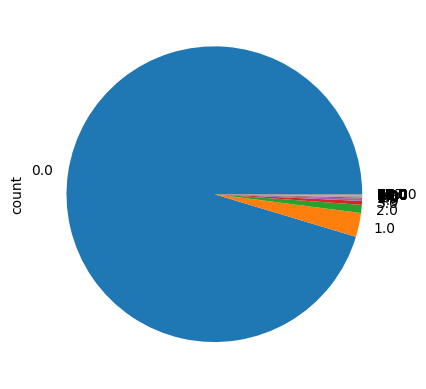

In [46]:
df['clicks'].value_counts().head(50).plot(kind='pie')

In [45]:
df[['clicks', 'shorttermbargain']].value_counts().head(20)

clicks  shorttermbargain
0.0     0                   231428
1.0     0                     6335
2.0     0                     2139
3.0     0                     1020
0.0     1                      834
4.0     0                      557
5.0     0                      352
6.0     0                      200
7.0     0                      153
8.0     0                      103
9.0     0                       65
10.0    0                       55
1.0     1                       41
11.0    0                       32
12.0    0                       26
14.0    0                       24
13.0    0                       24
15.0    0                       17
16.0    0                       14
17.0    0                       14
Name: count, dtype: int64

In [43]:
df[['clicks', 'bargain']].value_counts().head(20)

clicks  bargain
0.0     0          230142
1.0     0            6270
0.0     1            2120
2.0     0            2117
3.0     0            1001
4.0     0             545
5.0     0             343
6.0     0             198
7.0     0             150
1.0     1             106
8.0     0             101
9.0     0              65
10.0    0              54
2.0     1              36
11.0    0              32
3.0     1              27
12.0    0              26
14.0    0              24
13.0    0              22
4.0     1              20
Name: count, dtype: int64

In [61]:
df[['prev_clicks', 'clicks']].corr()

prev_clicks    clicks
prev_clicks     1.000000  0.877073
clicks          0.877073  1.000000

In [50]:
df['bargain'].value_counts()

bargain
0    242313
1      2352
Name: count, dtype: int64

In [51]:
df['shorttermbargain'].value_counts()

shorttermbargain
0    243743
1       922
Name: count, dtype: int64

In [54]:
df['discount'].value_counts().head(25)

discount
0.0     242313
15.0       167
12.0       149
11.0       145
18.0       145
13.0       129
20.0       127
17.0       109
24.0       105
16.0       102
19.0       101
14.0        89
27.0        82
10.0        80
23.0        74
26.0        71
21.0        71
28.0        65
25.0        62
22.0        46
29.0        45
9.0         31
59.0        29
32.0        28
30.0        21
Name: count, dtype: int64

<Axes: ylabel='count'>

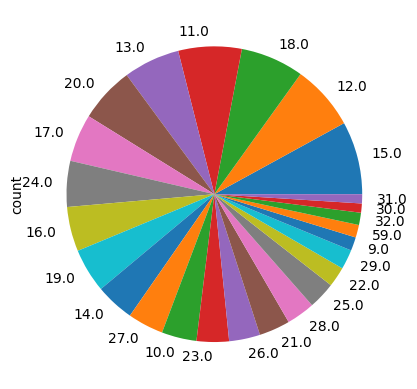

In [56]:
df[df['discount'] != 0.0]['discount'].value_counts().head(25).plot(kind='pie')

In [57]:
df[['shorttermbargain', 'bargain', 'discount']].corr()

shorttermbargain   bargain  discount
shorttermbargain          1.000000  0.624265  0.567421
bargain                   0.624265  1.000000  0.891223
discount                  0.567421  0.891223  1.000000

In [60]:
df[['prev_impressions', 'impressions']].corr()

prev_impressions  impressions
prev_impressions           1.00000      0.86965
impressions                0.86965      1.00000

In [24]:
df['productscore'].value_counts()

productscore
-1.0     107625
 42.0      4600
 41.0      4576
 40.0      4571
 43.0      4414
          ...  
 8.0         24
 6.0         12
 74.0        10
 5.0          3
 4.0          3
Name: count, Length: 73, dtype: int64

In [25]:
df['relevance_score'].value_counts()

relevance_score
56700     7894
37800     7162
75600     4589
39690     3473
60480     2889
          ... 
227730       1
171160       1
954010       1
867140       1
417170       1
Name: count, Length: 25647, dtype: int64

In [62]:
df['relevance_label'].value_counts()

relevance_label
0.0    214441
4.0      5630
1.0      2621
2.0      2528
3.0       570
Name: count, dtype: int64

In [30]:
df['cookie_value'].value_counts()

cookie_value
01442sb34dl0xq74jz    616
014h0h0000ldvtk8k7    300
01kb0h0000lku4lwa2    248
01vxd7ak00kgfkwev2    240
012q0h0000l8vqycfe    240
                     ... 
01bmw3cn00ke0xobu3      1
01lv83l400lgphi996      1
012694j100kkmf5not      1
01jd4aaz00klcgt1d9      1
01hl0h0000lhakmnm6      1
Name: count, Length: 4441, dtype: int64

In [34]:
df[df['cookie_value'] == '01442sb34dl0xq74jz']['query'].value_counts()

query
versace blue jeans       240
mercedes benz intense    240
prada l'homme            136
Name: count, dtype: int64

In [35]:
df[df['cookie_value'] == '014h0h0000ldvtk8k7']['query'].value_counts()

query
s22                         60
pixel 6 pro                 60
s21 ultra                   60
samsung galaxy s20 ultra    60
xiaomi poco                 60
Name: count, dtype: int64

In [36]:
df[df['cookie_value'] == '01kb0h0000lku4lwa2']['query'].value_counts()

query
lego 75336    60
lego 75301    60
lego 42110    60
lego 42145    58
lego 42144    10
Name: count, dtype: int64

In [49]:
df['id'].value_counts()

id
202839801              72
202296758              72
201624555              71
202069623              71
3531296243454050420    70
202093449              69
202093777              69
202069622              69
202277830              68
202296754              65
202299653              64
201817814              63
201263676              63
3535447754855678405    62
202093350              62
202296766              61
202277822              60
202093781              60
202299625              59
202277837              59
6762916                59
202093447              59
202299329              59
201850093              59
202093749              58
201211950              58
201947009              58
202299309              53
202093454              53
202093778              53
202093776              52
202299303              52
202301157              51
202299328              51
202299319              51
202296782              50
202093364              50
201898187              50
352730552

In [38]:
df['categoryid'].value_counts()

categoryid
19116    19535
14852    14255
25496     6915
5453      6084
3747      5588
         ...  
30463        1
13792        1
28950        1
31382        1
18721        1
Name: count, Length: 1588, dtype: int64

In [45]:
df['trace_time'].value_counts()

trace_time
1692218126084    616
1692221700560    180
1692212796656    120
1692192378729    120
1692165994310    120
                ... 
1692171705940      1
1692172193040      1
1692176252586      1
1692178698049      1
1692228200165      1
Name: count, Length: 4778, dtype: int64

In [47]:
df['topcategory'].value_counts()

topcategory
19116    35220
25496    11998
2520      9107
3747      8371
2925      6572
         ...  
22636        3
3326         2
21096        1
11473        1
16837        1
Name: count, Length: 489, dtype: int64

In [48]:
df['shopid'].value_counts()

shopid
-1.0         137040
 12041.0      23640
 26895.0      13826
 9701.0       13769
 4640.0        8996
              ...  
 292464.0         1
 329182.0         1
 28297.0          1
 309238.0         1
 290439.0         1
Name: count, Length: 1835, dtype: int64

In [49]:
df[df['shopid'] == -1.0]

trace_time        cookie_value                    query  results  \
4       1692220521164  01hn0h0000lle7vnfx               air pods 3    59498   
5       1692200568744  01tt0h0000l8wvdabq              nikon p1000      489   
11      1692218103489  01bk0h0000laazc7l1         instax mini film     1968   
12      1692218103489  01bk0h0000laazc7l1         instax mini film     1968   
19      1692192820006  01kf0h0000lldrvmqv        marantz cinema 40      145   
...               ...                 ...                      ...      ...   
244658  1692212492697  01j61owx00lle3ltxu           lenovo tab p11    20333   
244659  1692216755129  01970h0000lf5jh5vx          asus zenfone 10    15304   
244660  1692228017411  010nbe8h00l8r3nog3  galaxy samsung 23 ultra  2004191   
244661  1692228017411  010nbe8h00l8r3nog3  galaxy samsung 23 ultra  2004191   
244664  1692219642253  01yf0h0000li3hbz6f               iphone 12   2861903   

        topcategory         id   price  totalprice  popularity  categoryid  \
4              2520    6837655    8799        8799        3823        2520   
5             12332  200352498    3544        3544           0        4972   
11             4974  200125607    6995        7347          71       30990   
12             4974  200125613    7220        7300         107       30990   
19             1840  201859059  239000      239000          33        1840   
...             ...        ...     ...         ...         ...         ...   
244658         3747  203008178    7780        8379          34        3047   
244659        19116  202938767   84790       84800          86       19116   
244660        19116  202299323   91100       91100         462       19116   
244661        19116  202299316   66500       66500         830       19116   
244664        19116  200722541  108900      108900          82       19116   

        manuid  shopid  availability  rating   tests  numratings  discount  \
4        11880    -1.0             1   450.0  8798.0        77.0      59.0   
5       131023    -1.0             0    -1.0    -1.0         0.0       0.0   
11        1125    -1.0             0    -1.0    -1.0         0.0       0.0   
12        1125    -1.0             0    -1.0    -1.0         0.0       0.0   
19        1447    -1.0             0    -1.0  9280.0         0.0       0.0   
...        ...     ...           ...     ...     ...         ...       ...   
244658   14780    -1.0             0    -1.0    -1.0         0.0       0.0   
244659    1038    -1.0             0    -1.0    -1.0         0.0       0.0   
244660    1049    -1.0             0    -1.0    -1.0         0.0       0.0   
244661    1049    -1.0             0    -1.0    -1.0         0.0       0.0   
244664   11880    -1.0             0    -1.0    -1.0         0.0       0.0   

        shorttermbargain  bargain  productscore   listedsince  \
4                      1        1          54.0  1.572304e+12   
5                      0        0          19.0  1.590703e+12   
11                     0        0          56.0  1.583363e+12   
12                     0        0          56.0  1.583363e+12   
19                     0        0          49.0  1.646348e+12   
...                  ...      ...           ...           ...   
244658                 0        0          36.0  1.689113e+12   
244659                 0        0          54.0  1.688076e+12   
244660                 0        0          60.0  1.675206e+12   
244661                 0        0          60.0  1.675206e+12   
244664                 0        0          40.0  1.601935e+12   

        relevance_score  text_relevance  itemtype   date_utc  prev_clicks  \
4                 83590       55.100000         3 2023-08-16          3.0   
5                 79050       75.000000         2 2023-08-16          0.0   
11                84460       65.200000         3 2023-08-16          0.0   
12                86190       65.200000         3 2023-08-16          0.0   
19                6849

In [5]:
df[df['shopid'] == -1.0]['query'].value_counts()

query
redmi 12                             180
controller wireless xbox series x    120
on cloud                             120
samsung galaxy s20 fe 5g             120
nike air force                       120
                                    ... 
4000420308775                          1
lego 43230                             1
4210201412779                          1
thule 710600                           1
olympus ee1                            1
Name: count, Length: 4725, dtype: int64

In [50]:
df[df['shopid'] == -1.0].availability.value_counts()

availability
0    126184
1      7031
2      2874
5       951
Name: count, dtype: int64

In [6]:
df[df['shopid'] == -1.0].bargain.value_counts()

bargain
0    134688
1      2352
Name: count, dtype: int64

In [9]:
df[df['shopid'] == -1.0].shorttermbargain.value_counts()

shorttermbargain
0    136118
1       922
Name: count, dtype: int64

In [8]:
df['results'].value_counts()

results
72         960
69         960
65         900
78         840
56         840
          ... 
9770        60
1681        60
1863466     60
2597        60
2275        59
Name: count, Length: 2587, dtype: int64

In [57]:
df['text_relevance'].value_counts()

text_relevance
75.000000      23835
50.000000      22939
100.000000     11942
25.000000      10445
80.000000       8508
55.000000       6851
75.300000       6221
55.100000       6015
80.100000       4938
30.100000       4750
125.000000      4699
105.000000      3967
30.000000       3800
50.200000       3309
750.000000      3029
100.400000      3014
55.200000       2981
500.000000      2735
80.200000       2687
75.100000       2602
50.100000       2589
80.300000       2329
60.100000       2321
60.200000       2260
105.200000      2006
250.000000      1962
75.200000       1937
60.000000       1903
35.100000       1622
25.100000       1557
130.000000      1536
85.200000       1521
1000.000000     1518
800.000000      1472
550.000000      1459
150.000000      1350
85.300000       1294
105.100000      1278
125.500000      1237
105.300000      1218
100.200000      1077
85.000000        996
40.100000        977
65.200000        965
85.100000        923
100.300000       899
1050.000000      84

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()
query_encoded = le.fit_transform(df['query'])
cookie_value_encoded = le.fit_transform(df['cookie_value'])

In [5]:
df['query_encoded'] = query_encoded
df['cookie_value_encoded'] = cookie_value_encoded

In [6]:
encoded_df = df.drop(columns=['query', 'cookie_value'])
encoded_df = encoded_df.fillna(0)
encoded_df

trace_time  results  topcategory                   id   price  \
0       1692216825804     1377         4995  3509604132933600003    5451   
1       1692211903439      102         9272  3548574108113437554   49090   
2       1692211507151      110        15592  3530515860405879623   38899   
3       1692183090078       64        14173  3470293304510251280     385   
4       1692220521164    59498         2520              6837655    8799   
...               ...      ...          ...                  ...     ...   
244660  1692228017411  2004191        19116            202299323   91100   
244661  1692228017411  2004191        19116            202299316   66500   
244662  1692197747233      470         3751  3546260397063406153  196900   
244663  1692201772174       12        11273  3548787712563609728   49900   
244664  1692219642253  2861903        19116            200722541  108900   

        totalprice  popularity  categoryid  manuid    shopid  availability  \
0             5451           0        4995       0    5300.0             0   
1            49639           0        3751   33280  301558.0             3   
2            39098          44        5852   16600  318806.0             1   
3              385           0       14173       0   12041.0             0   
4             8799        3823        2520   11880      -1.0             1   
...            ...         ...         ...     ...       ...           ...   
244660       91100         462       19116    1049      -1.0             0   
244661       66500         830       19116    1049      -1.0             0   
244662      197399           0        3751       0  328396.0             0   
244663       49900           0        3686       0    9701.0             1   
244664      108900          82       19116   11880      -1.0             0   

        rating   tests  numratings  discount  shorttermbargain  bargain  \
0         -1.0    -1.0         0.0       0.0                 0        0   
1         -1.0    -1.0         0.0       0.0                 0        0   
2         -1.0    -1.0         0.0       0.0                 0        0   
3         -1.0    -1.0         0.0       0.0                 0        0   
4        450.0  8798.0        77.0      59.0                 1        1   
...        ...     ...         ...       ...               ...      ...   
244660    -1.0    -1.0         0.0       0.0                 0        0   
244661    -1.0    -1.0         0.0       0.0                 0        0   
244662    -1.0    -1.0         0.0       0.0                 0        0   
244663    -1.0    -1.0         0.0       0.0                 0        0   
244664    -1.0    -1.0         0.0       0.0                 0        0   

        productscore   listedsince  relevance_score  text_relevance  itemtype  \
0               -1.0  0.000000e+00            28350       37.500000         0   
1               -1.0  0.000000e+00            79380      105.000000         0   
2               -1.0  0.000000e+00            45390       50.000000         0   
3               -1.0  0.000000e+00            13230       25.000000         0   
4               54.0  1.572304e+12            83590       55.100000         3   
...              ...           ...              ...             ...       ...   
244660          60.0  1.675206e+12           120560       85.200000         3   
244661          60.0  1.675206e+12           123750       85.200000         3   
244662          -1.0  0.000000e+00            54000       75.000000         0   
244663          -1.0  0.000000e+00            42870      750.000000         0   
244664          40.0  1.601935e+12            76690       60.199997         3   

         date_utc  prev_clicks  prev_impressions  clicks  impressions  \
0      2023-08-16          0.0              60.0     0.0          4.0   
1      2023-08-16          0.0               5.0     0.0          4.0   
2      2023-08-16          0.0              68.0     0.0          3.

In [27]:
correlation_df = encoded_df.corr()
correlation_df

trace_time   results  topcategory        id     price  \
trace_time              1.000000  0.053088     0.035477 -0.134742  0.002883   
results                 0.053088  1.000000     0.157927 -0.242517 -0.000980   
topcategory             0.035477  0.157927     1.000000 -0.066669 -0.003118   
id                     -0.134742 -0.242517    -0.066669  1.000000  0.004112   
price                   0.002883 -0.000980    -0.003118  0.004112  1.000000   
totalprice              0.002883 -0.000982    -0.003104  0.004099  0.999998   
popularity              0.035302  0.178935     0.037103 -0.129440 -0.000103   
categoryid              0.014726  0.103588     0.520324 -0.028814 -0.000689   
manuid                  0.001897 -0.057675     0.121199  0.032333 -0.004420   
shopid                 -0.062826 -0.126611     0.048461  0.513901  0.000210   
availability           -0.024465 -0.076547     0.036626  0.239493  0.002058   
rating                  0.037757  0.094776    -0.003750 -0.234759 -0.001696   
tests                   0.034083  0.052751    -0.010971 -0.237596 -0.000769   
numratings              0.014943  0.029013    -0.015272 -0.052201 -0.000444   
discount                0.013532  0.016048     0.000691 -0.077416 -0.000251   
shorttermbargain        0.016193  0.011175    -0.005623 -0.054226  0.000085   
bargain                 0.017230  0.015478     0.004100 -0.086864  0.000064   
productscore            0.140335  0.289955     0.075550 -0.901124 -0.002880   
listedsince             0.029834  0.099864     0.043171  0.799648  0.096427   
relevance_score        -0.048740 -0.013368    -0.044506 -0.093623  0.000176   
text_relevance         -0.087745 -0.066012    -0.062022  0.145507 -0.000464   
itemtype                0.137216  0.247290     0.068353 -0.978169 -0.003634   
date_utc                     NaN       NaN          NaN       NaN       NaN   
prev_clicks             0.042514  0.051882     0.008098 -0.074817 -0.000245   
prev_impressions        0.206468  0.286769     0.056082 -0.159459 -0.001059   
clicks                  0.051486  0.047575     0.009337 -0.076415 -0.000305   
impressions             0.259849  0.264485     0.058370 -0.159713 -0.000597   
relevance_label         0.024587  0.013047     0.006394 -0.153476 -0.000753   
query_encoded          -0.017768  0.080989     0.015047 -0.058137 -0.001523   
cookie_value_encoded   -0.020122 -0.047534    -0.017568  0.003292 -0.001965   

                      totalprice  popularity  categoryid    manuid    shopid  \
trace_time              0.002883    0.035302    0.014726  0.001897 -0.062826   
results                -0.000982    0.178935    0.103588 -0.057675 -0.126611   
topcategory            -0.003104    0.037103    0.520324  0.121199  0.048461   
id                      0.004099   -0.129440   -0.028814  0.032333  0.513901   
price                   0.999998   -0.000103   -0.000689 -0.004420  0.000210   
totalprice              1.000000   -0.000103   -0.000706 -0.004446  0.000212   
popularity             -0.000103    1.000000    0.025572 -0.074828 -0.067785   
categoryid             -0.000706    0.025572    1.000000  0.104267  0.034746   
manuid                 -0.004446   -0.074828    0.104267  1.000000  0.129850   
shopid                  0.000212   -0.067785    0.034746  0.129850  1.000000   
availability            0.002071   -0.053568    0.026429  0.023869  0.157638   
rating                 -0.001695    0.153440   -0.034768 -0.118250 -0.122899   
tests                  -0.000766    0.303219   -0.031285 -0.106786 -0.124385   
numratings             -0.000444    0.071261   -0.023260 -0.036642 -0.027328   
discount               -0.000247    0.015663   -0.003734 -0.010195 -0.040528   
shorttermbargain        0.000089    0.006409   -0.012285 -0.018791 -0.028388   
bargain                 0.000069    0.007794   -0.000777 -0.017025 -0.045475   
productscore           -0.002869    0.238767    0.030786 -0.145004 -0.471749   
listedsince             0.096225    0.053103    0.06

<Axes: >

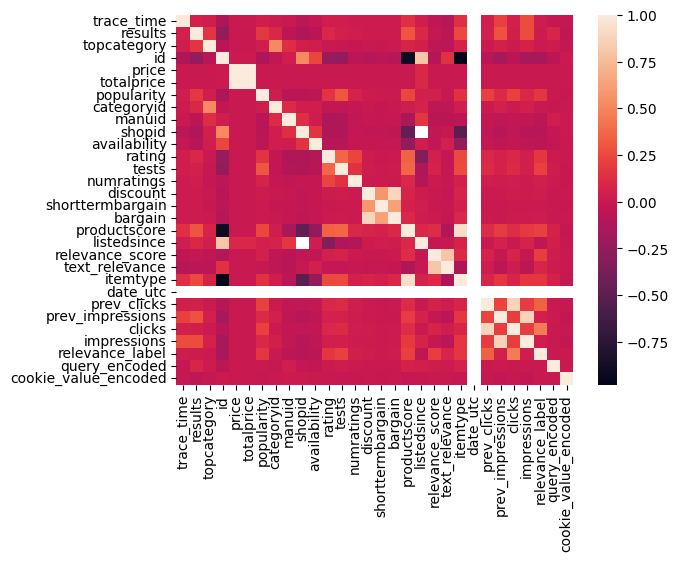

In [35]:
sns.heatmap(correlation_df, xticklabels=correlation_df.columns, yticklabels=correlation_df.columns)

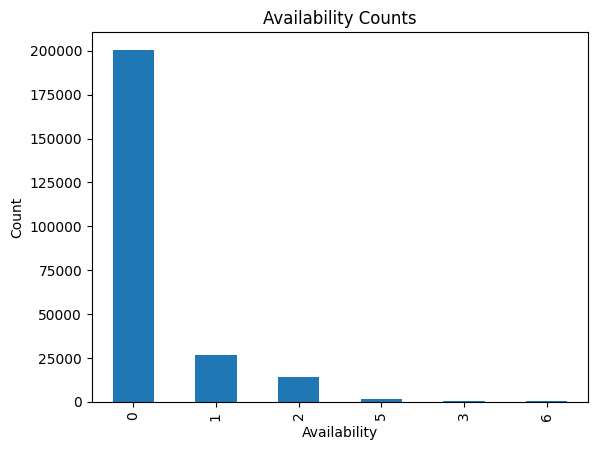

In [43]:
availability_counts = df['availability'].value_counts()
availability_counts.plot(kind='bar')
plt.xlabel('Availability')
plt.ylabel('Count')
plt.title('Availability Counts')
plt.show()

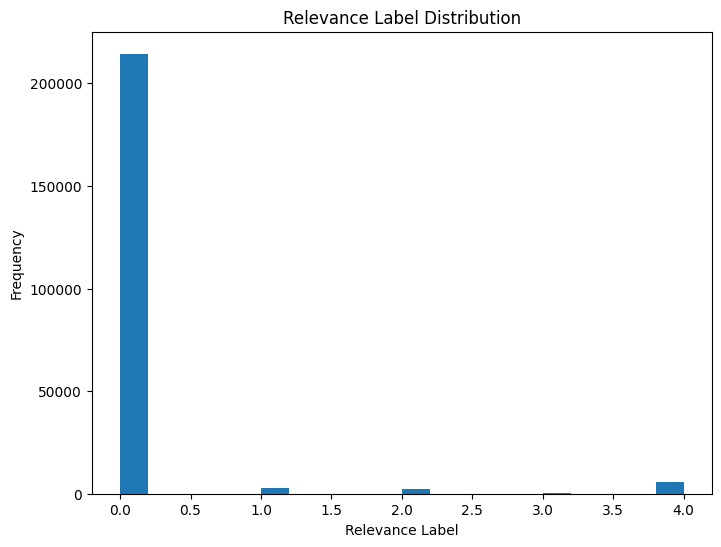

In [56]:
plt.figure(figsize=(8, 6))
plt.hist(df['relevance_label'], bins=20)
plt.title('Relevance Label Distribution')
plt.xlabel('Relevance Label')
plt.ylabel('Frequency')
plt.show()

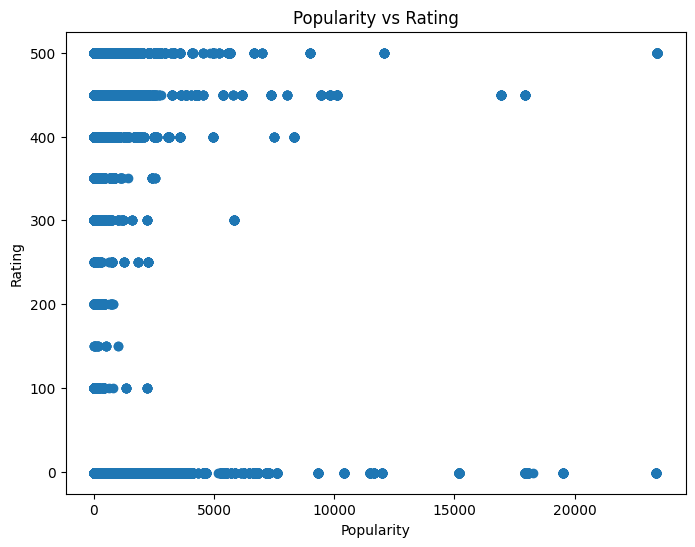

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(df['popularity'], df['rating'])
plt.title('Popularity vs Rating')
plt.xlabel('Popularity')
plt.ylabel('Rating')
plt.show()

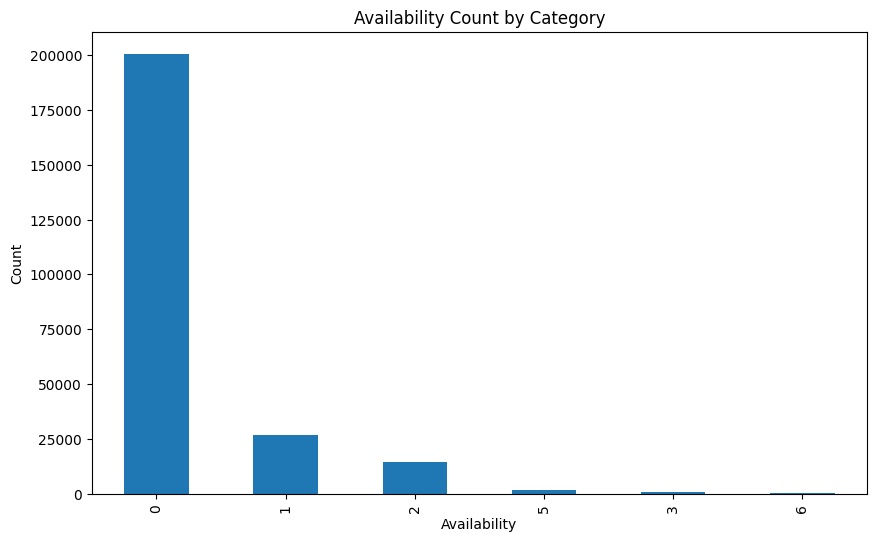

In [58]:
availability_counts = df['availability'].value_counts()
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar')
plt.title('Availability Count by Category')
plt.xlabel('Availability')
plt.ylabel('Count')
plt.show()

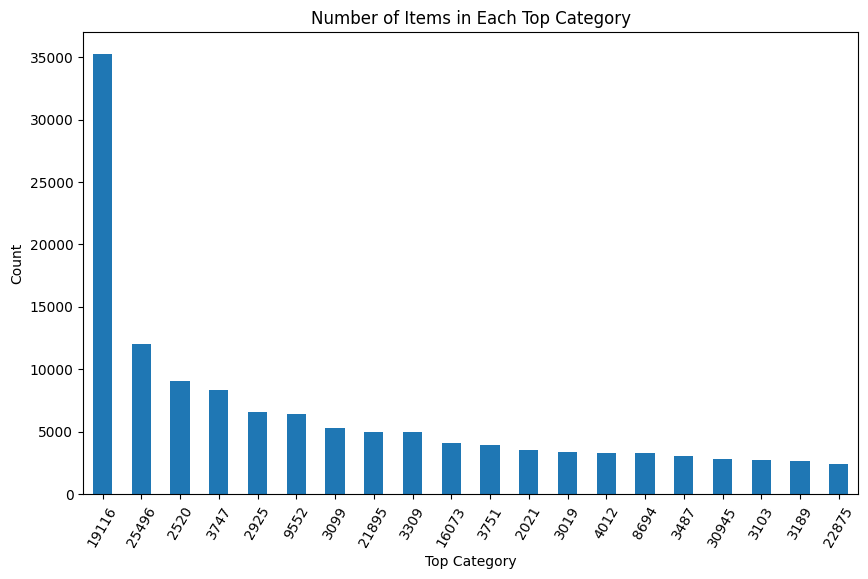

In [63]:
plt.figure(figsize=(10, 6))
category_counts = df['topcategory'].value_counts().head(20)
category_counts.plot(kind='bar')
plt.title('Number of Items in Each Top Category')
plt.xlabel('Top Category')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

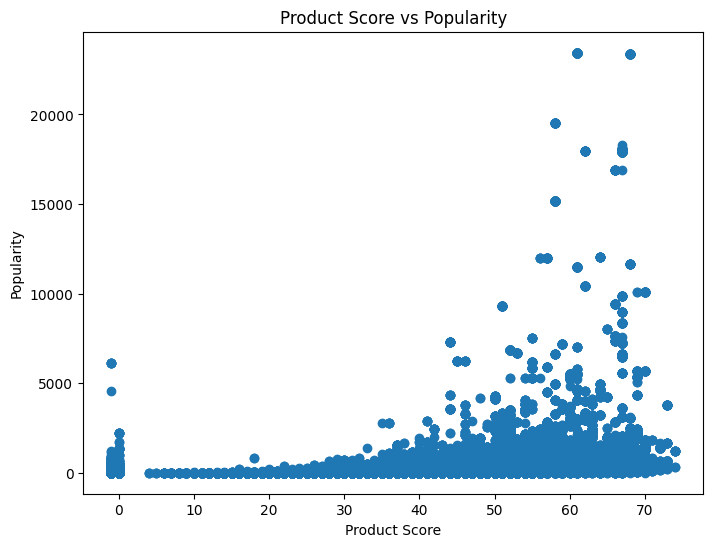

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(df['productscore'], df['popularity'])
plt.title('Product Score vs Popularity')
plt.xlabel('Product Score')
plt.ylabel('Popularity')
plt.show()

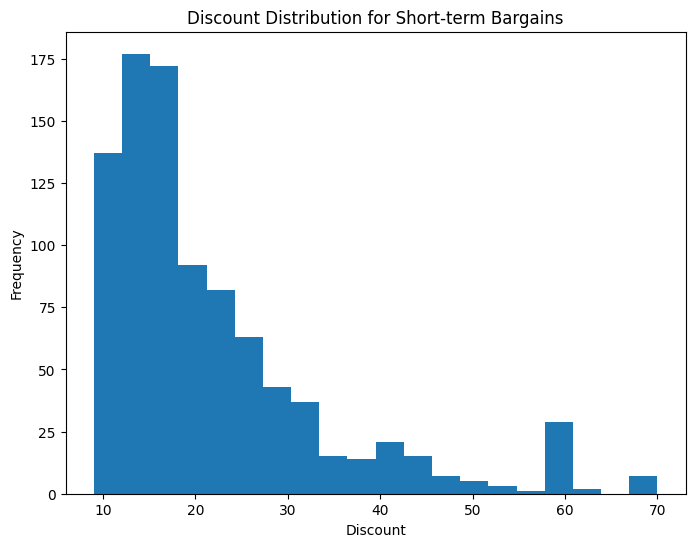

In [74]:
short_term_bargain_discounts = df[df['shorttermbargain'] == 1]['discount']
plt.figure(figsize=(8, 6))
plt.hist(short_term_bargain_discounts, bins=20)
plt.title('Discount Distribution for Short-term Bargains')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

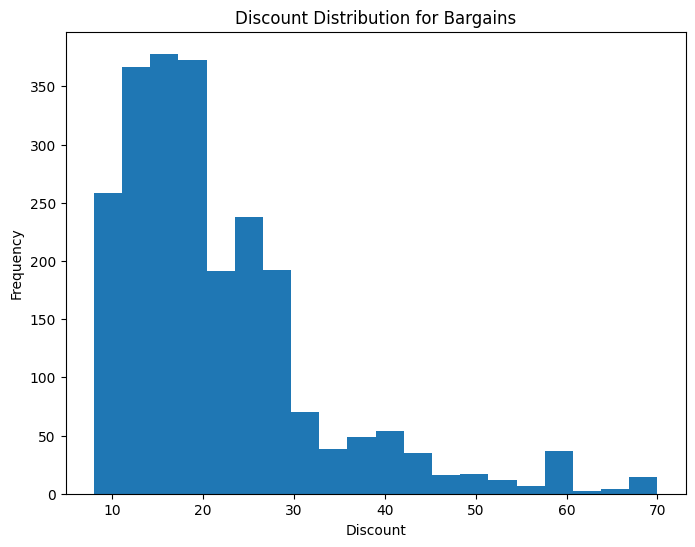

In [65]:
short_term_bargain_discounts = df[df['bargain'] == 1]['discount']
plt.figure(figsize=(8, 6))
plt.hist(short_term_bargain_discounts, bins=20)
plt.title('Discount Distribution for Bargains')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

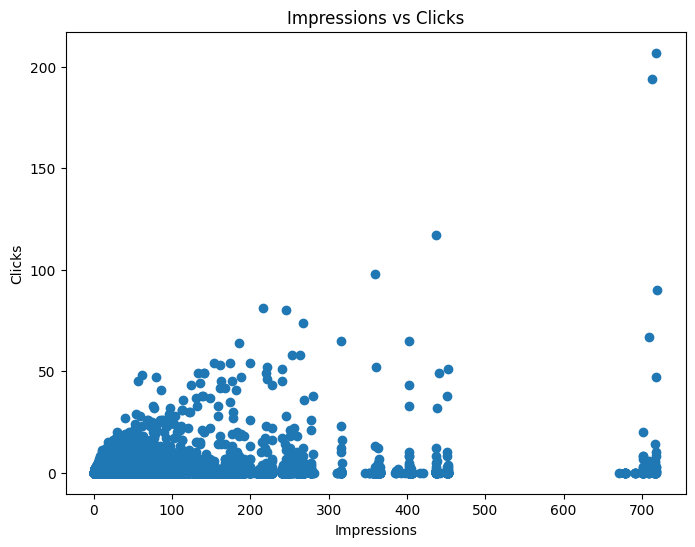

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(df['impressions'], df['clicks'])
plt.title('Impressions vs Clicks')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.show()

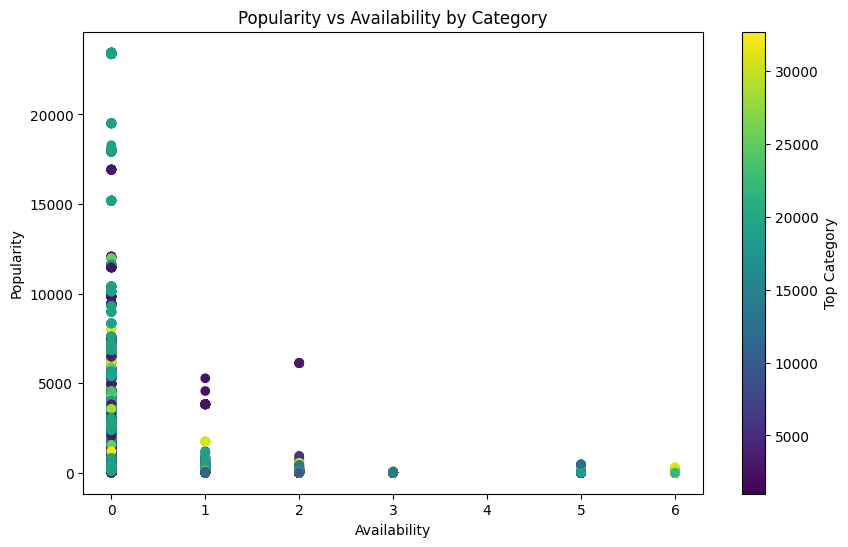

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(df['availability'], df['popularity'], c=df['topcategory'], cmap='viridis')
plt.title('Popularity vs Availability by Category')
plt.xlabel('Availability')
plt.ylabel('Popularity')
plt.colorbar(label='Top Category')
plt.show()

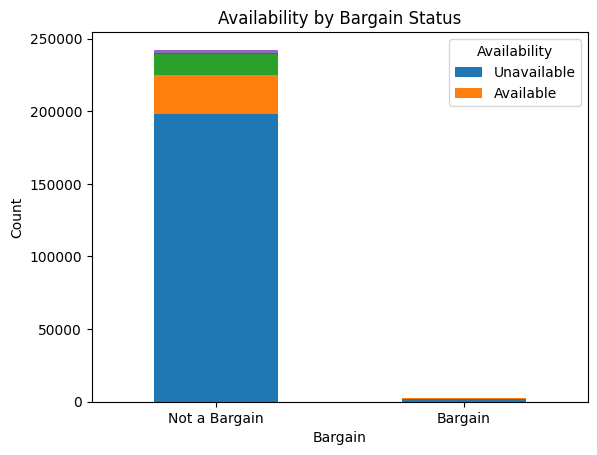

In [83]:
availability_by_bargain = df.groupby(['bargain', 'availability']).size().unstack()
availability_by_bargain.plot(kind='bar', stacked=True)
plt.title('Availability by Bargain Status')
plt.xlabel('Bargain')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not a Bargain', 'Bargain'], rotation=0)
plt.legend(title='Availability', labels=['Unavailable', 'Available'])
plt.show()

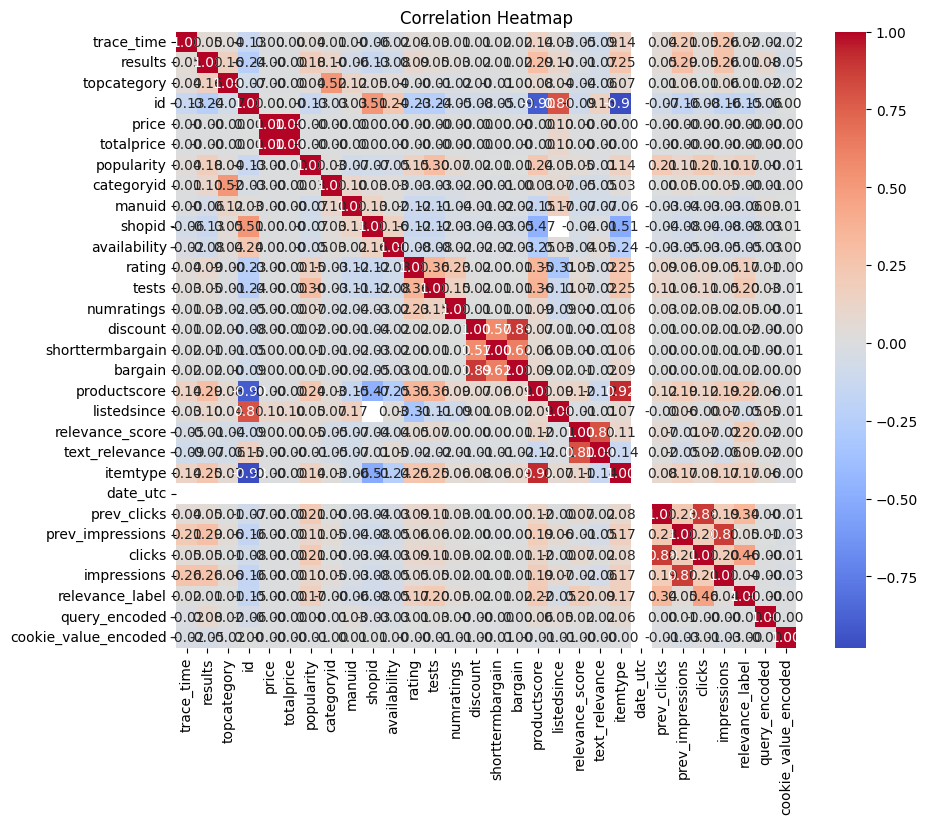

In [85]:
plt.figure(figsize=(10, 8))
corr_matrix = encoded_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

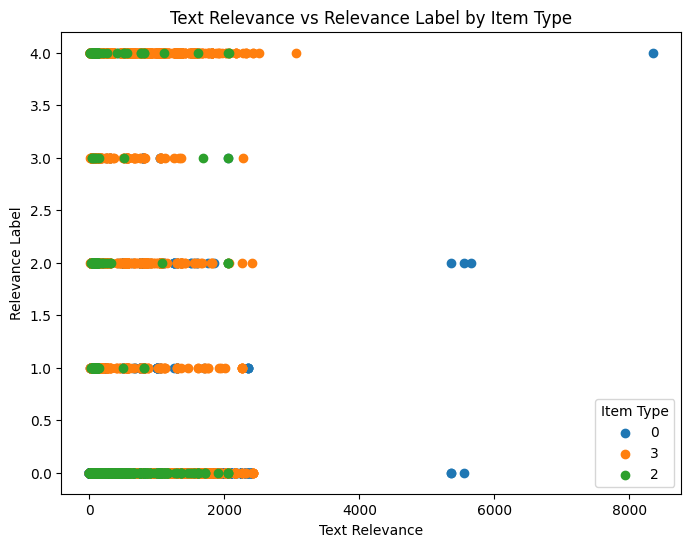

In [87]:
plt.figure(figsize=(8, 6))
for item_type in df['itemtype'].unique():
    data = df[df['itemtype'] == item_type]
    plt.scatter(data['text_relevance'], data['relevance_label'], label=item_type)
plt.title('Text Relevance vs Relevance Label by Item Type')
plt.xlabel('Text Relevance')
plt.ylabel('Relevance Label')
plt.legend(title='Item Type')
plt.show()

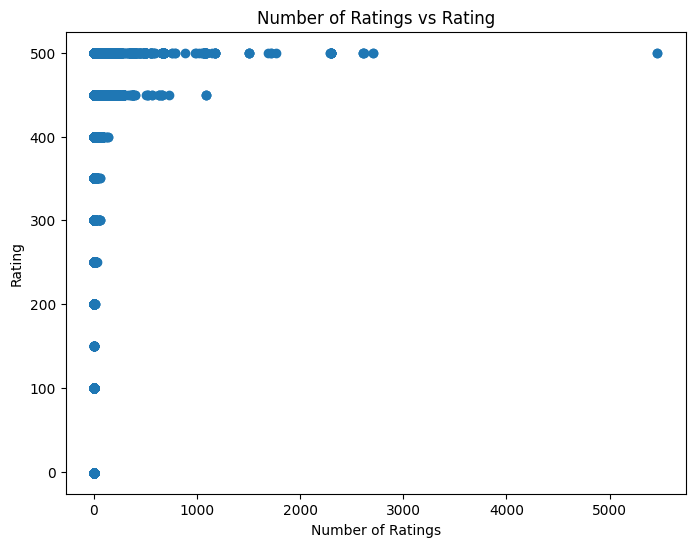

In [92]:
plt.figure(figsize=(8, 6))
plt.scatter(df['numratings'], df['rating'])
plt.title('Number of Ratings vs Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Rating')
plt.show()

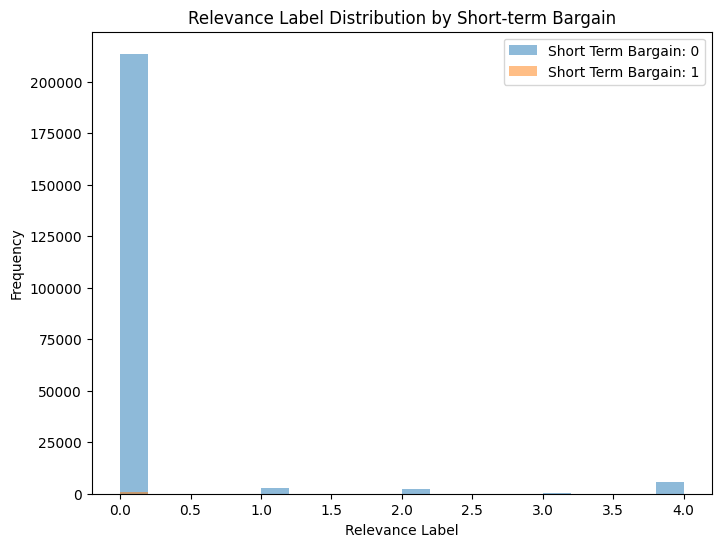

In [96]:
plt.figure(figsize=(8, 6))
for bargain_flag in df['shorttermbargain'].unique():
    data = df[df['shorttermbargain'] == bargain_flag]
    plt.hist(data['relevance_label'], alpha=0.5, bins=20, label=f'Short Term Bargain: {bargain_flag}')
plt.title('Relevance Label Distribution by Short-term Bargain')
plt.xlabel('Relevance Label')
plt.ylabel('Frequency')
plt.legend()
plt.show()

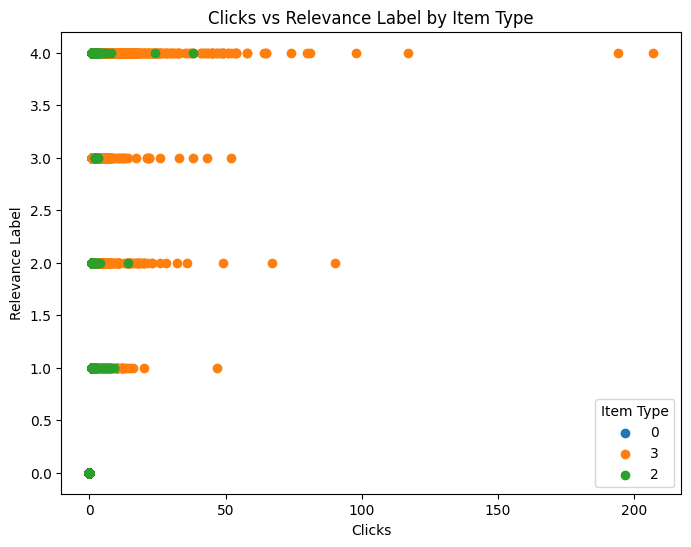

In [98]:
plt.figure(figsize=(8, 6))
for item_type in df['itemtype'].unique():
    data = df[df['itemtype'] == item_type]
    plt.scatter(data['clicks'], data['relevance_label'], label=item_type)
plt.title('Clicks vs Relevance Label by Item Type')
plt.xlabel('Clicks')
plt.ylabel('Relevance Label')
plt.legend(title='Item Type')
plt.show()

In [7]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5, step=1)
X_new = rfe.fit_transform(encoded_df.drop(columns=['date_utc', 'relevance_label', 'relevance_score'], axis=1), encoded_df['relevance_label'])

In [9]:
selected_features = encoded_df.drop(['date_utc', 'relevance_label', 'relevance_score'], axis=1).columns[rfe.support_]
print("Selected columns:")
print(selected_features)

Selected columns:
Index(['popularity', 'prev_clicks', 'prev_impressions', 'clicks',
       'impressions'],
      dtype='object')


In [10]:
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=15, step=1)
X_new = rfe.fit_transform(encoded_df.drop(columns=['date_utc', 'relevance_label', 'relevance_score'], axis=1), encoded_df['relevance_label'])

In [11]:
selected_features = encoded_df.drop(['date_utc', 'relevance_label', 'relevance_score'], axis=1).columns[rfe.support_]
print("Selected columns:")
print(selected_features)

Selected columns:
Index(['trace_time', 'results', 'id', 'price', 'totalprice', 'popularity',
       'productscore', 'listedsince', 'text_relevance', 'prev_clicks',
       'prev_impressions', 'clicks', 'impressions', 'query_encoded',
       'cookie_value_encoded'],
      dtype='object')


In [43]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score
from sklearn.model_selection import GridSearchCV

In [20]:
train_data, test_data = train_test_split(encoded_df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(encoded_df, test_size=0.2, random_state=42)

In [32]:
features = encoded_df[['popularity', 'prev_clicks', 'prev_impressions', 'clicks', 'impressions']].columns
#target = 'relevance_score'
target = 'relevance_label'

In [24]:
features = encoded_df[['trace_time', 'results', 'id', 'price', 'totalprice', 'popularity','productscore', 
                                    'listedsince', 'text_relevance', 'prev_clicks', 'prev_impressions', 'clicks', 'impressions',
                                    'query_encoded', 'cookie_value_encoded']].columns
target = 'relevance_score'
#target = 'relevance_label'

In [37]:
features = encoded_df.drop(columns=['relevance_score', 'relevance_label', 'date_utc']).columns
#target = 'relevance_score'
target = 'relevance_label'

In [38]:
train_dmatrix = xgb.DMatrix(train_data[features], label=train_data[target])
val_dmatrix = xgb.DMatrix(val_data[features], label=val_data[target])
test_dmatrix = xgb.DMatrix(test_data[features])

In [39]:
params = {
    'objective': 'rank:pairwise',
    'max_depth': 3,
    'eta': 0.1,
    'eval_metric': 'ndcg',
}

train_dmatrix = xgb.DMatrix(train_data[features], label=train_data['relevance_label'])
val_dmatrix = xgb.DMatrix(val_data[features], label=val_data['relevance_label'])

num_round = 100
bst = xgb.train(params, train_dmatrix, num_round, evals=[(val_dmatrix, 'validation')])

[0]	validation-ndcg:0.54755
[1]	validation-ndcg:0.91632
[2]	validation-ndcg:0.94421
[3]	validation-ndcg:0.98311
[4]	validation-ndcg:1.00000
[5]	validation-ndcg:1.00000
[6]	validation-ndcg:1.00000
[7]	validation-ndcg:1.00000
[8]	validation-ndcg:1.00000
[9]	validation-ndcg:1.00000
[10]	validation-ndcg:1.00000
[11]	validation-ndcg:1.00000
[12]	validation-ndcg:1.00000
[13]	validation-ndcg:1.00000
[14]	validation-ndcg:1.00000
[15]	validation-ndcg:1.00000
[16]	validation-ndcg:1.00000
[17]	validation-ndcg:1.00000
[18]	validation-ndcg:1.00000
[19]	validation-ndcg:1.00000
[20]	validation-ndcg:1.00000
[21]	validation-ndcg:1.00000
[22]	validation-ndcg:1.00000
[23]	validation-ndcg:1.00000
[24]	validation-ndcg:1.00000
[25]	validation-ndcg:1.00000
[26]	validation-ndcg:1.00000
[27]	validation-ndcg:1.00000
[28]	validation-ndcg:1.00000
[29]	validation-ndcg:1.00000
[30]	validation-ndcg:1.00000
[31]	validation-ndcg:1.00000
[32]	validation-ndcg:1.00000
[33]	validation-ndcg:1.00000
[34]	validation-ndcg:1.0

In [31]:
#relevance score as target with only 5 RFE features

test_predictions = bst.predict(test_dmatrix)

ndcg = ndcg_score([test_data[target]], [test_predictions])
print(f"Test NDCG: {ndcg}")

Test NDCG: 0.8387506503459822


In [27]:
#relevance score as target with only 15 RFE features

test_predictions = bst.predict(test_dmatrix)

ndcg = ndcg_score([test_data[target]], [test_predictions])
print(f"Test NDCG: {ndcg}")

Test NDCG: 0.8389196545825859


In [66]:
#relevance score as target

test_predictions = bst.predict(test_dmatrix)

ndcg = ndcg_score([test_data[target]], [test_predictions])
print(f"Test NDCG: {ndcg}")

Test NDCG: 0.8389011278391488


In [35]:
#relevance label as target with only 5 RFE features

test_predictions = bst.predict(test_dmatrix)

ndcg = ndcg_score([test_data[target]], [test_predictions])
print(f"Test NDCG: {ndcg}")

Test NDCG: 0.9842949136449275


In [23]:
#relevance label as target with only 15 RFE features

test_predictions = bst.predict(test_dmatrix)

ndcg = ndcg_score([test_data[target]], [test_predictions])
print(f"Test NDCG: {ndcg}")

Test NDCG: 0.9835846110959703


In [34]:
#relevance label as target

test_predictions = bst.predict(test_dmatrix)

ndcg = ndcg_score([test_data[target]], [test_predictions])
print(f"Test NDCG: {ndcg}")

Test NDCG: 0.9835378395074923


In [44]:
#relevance label as target (max depth=3)

test_predictions = bst.predict(test_dmatrix)

ndcg = ndcg_score([test_data[target]], [test_predictions])
print(f"Test NDCG: {ndcg}")

Test NDCG: 0.9834471765229292


In [72]:
def ndcg(y_pred, y_true):
    # Define a function to calculate DCG (Discounted Cumulative Gain)
    def dcg_at_k(r, k):
        r = np.asfarray(r)[:k]
        if r.size:
            return np.sum((2 ** r - 1) / np.log2(np.arange(2, r.size + 2)))
        return 0

    # Calculate the ideal order (sorted by relevance label)
    ideal_order = sorted(y_true, reverse=True)

    # Calculate the DCG for both the predicted order and ideal order
    k = min(len(y_true), len(y_pred))
    dcg_p = dcg_at_k(y_pred, k)
    dcg_i = dcg_at_k(ideal_order, k)

    # Calculate NDCG (Normalized DCG)
    if dcg_i == 0:
        return 0
    return dcg_p / dcg_i

In [56]:
train_data['group_id'] = train_data['artificial_query_group'].apply(tuple).factorize()[0]
val_data['group_id'] = val_data['artificial_query_group'].apply(tuple).factorize()[0]

# Then, use 'group_id' as your grouping variable
group_encoder = LabelEncoder()
group_encoder.fit(train_data['group_id'])
train_data['group_id'] = group_encoder.transform(train_data['group_id'])
val_data['group_id'] = group_encoder.transform(val_data['group_id'])

In [36]:
param_grid = {
    'max_depth': [3, 6, 9],  # values for max_depth
    'eta': [0.1, 0.01, 0.001],  # values for eta (learning rate)
    'subsample': [0.7, 0.8, 0.9],  # values for subsample
    'colsample_bytree': [0.7, 0.8, 0.9],  # values for colsample_bytree
}

best_score = 0  # Initialize a variable to track the best NDCG score
best_params = {}  # Initialize a variable to track the best parameters

# Iterate over all possible combinations of hyperparameters
for max_depth in param_grid['max_depth']:
    for eta in param_grid['eta']:
        for subsample in param_grid['subsample']:
            for colsample_bytree in param_grid['colsample_bytree']:
                params = {
                    'objective': 'rank:pairwise',
                    'max_depth': max_depth,
                    'eta': eta,
                    'subsample': subsample,
                    'colsample_bytree': colsample_bytree,
                    'eval_metric': 'ndcg',
                }

                # Train the XGBoost model with the current parameters
                train_dmatrix = xgb.DMatrix(train_data[features], label=train_data['relevance_label'])
                val_dmatrix = xgb.DMatrix(val_data[features], label=val_data['relevance_label'])
                num_round = 100
                bst = xgb.train(params, train_dmatrix, num_round, evals=[(val_dmatrix, 'validation')])

                # Evaluate the model's NDCG score
                eval_result = bst.eval(val_dmatrix)
                ndcg_score_value = float(eval_result.split(":")[-1])

                # Check if the current parameters achieve a better NDCG score
                if ndcg_score_value > best_score:
                    best_score = ndcg_score_value
                    best_params = params

# Print the best parameters and the corresponding NDCG score
print("Best Parameters:", best_params)
print("Best NDCG Score:", best_score)

[0]	validation-ndcg:0.54755
[1]	validation-ndcg:0.95692
[2]	validation-ndcg:0.95274
[3]	validation-ndcg:0.97211
[4]	validation-ndcg:1.00000
[5]	validation-ndcg:0.98220
[6]	validation-ndcg:0.98220
[7]	validation-ndcg:0.98220
[8]	validation-ndcg:0.98220
[9]	validation-ndcg:0.98220
[10]	validation-ndcg:0.98220
[11]	validation-ndcg:0.98884
[12]	validation-ndcg:0.98874
[13]	validation-ndcg:0.98874
[14]	validation-ndcg:0.98874
[15]	validation-ndcg:0.98863
[16]	validation-ndcg:0.98863
[17]	validation-ndcg:0.98863
[18]	validation-ndcg:0.98863
[19]	validation-ndcg:0.98863
[20]	validation-ndcg:0.98852
[21]	validation-ndcg:0.98852
[22]	validation-ndcg:0.98852
[23]	validation-ndcg:0.98783
[24]	validation-ndcg:0.98635
[25]	validation-ndcg:0.98535
[26]	validation-ndcg:0.98492
[27]	validation-ndcg:0.98387
[28]	validation-ndcg:0.98321
[29]	validation-ndcg:0.98321
[30]	validation-ndcg:0.98321
[31]	validation-ndcg:0.98321
[32]	validation-ndcg:1.00000
[33]	validation-ndcg:1.00000
[34]	validation-ndcg:1.0

[84]	validation-ndcg:1.00000
[85]	validation-ndcg:1.00000
[86]	validation-ndcg:1.00000
[87]	validation-ndcg:1.00000
[88]	validation-ndcg:1.00000
[89]	validation-ndcg:1.00000
[90]	validation-ndcg:1.00000
[91]	validation-ndcg:1.00000
[92]	validation-ndcg:1.00000
[93]	validation-ndcg:1.00000
[94]	validation-ndcg:1.00000
[95]	validation-ndcg:1.00000
[96]	validation-ndcg:1.00000
[97]	validation-ndcg:1.00000
[98]	validation-ndcg:1.00000
[99]	validation-ndcg:1.00000
[0]	validation-ndcg:0.54755
[1]	validation-ndcg:0.93912
[2]	validation-ndcg:0.93305
[3]	validation-ndcg:0.98277
[4]	validation-ndcg:0.98277
[5]	validation-ndcg:0.98277
[6]	validation-ndcg:0.98220
[7]	validation-ndcg:0.98220
[8]	validation-ndcg:0.98030
[9]	validation-ndcg:0.97993
[10]	validation-ndcg:0.97993
[11]	validation-ndcg:0.97993
[12]	validation-ndcg:0.97908
[13]	validation-ndcg:0.97908
[14]	validation-ndcg:0.97739
[15]	validation-ndcg:0.97666
[16]	validation-ndcg:0.97666
[17]	validation-ndcg:1.00000
[18]	validation-ndcg:1.0

[68]	validation-ndcg:1.00000
[69]	validation-ndcg:1.00000
[70]	validation-ndcg:1.00000
[71]	validation-ndcg:1.00000
[72]	validation-ndcg:1.00000
[73]	validation-ndcg:1.00000
[74]	validation-ndcg:1.00000
[75]	validation-ndcg:1.00000
[76]	validation-ndcg:1.00000
[77]	validation-ndcg:1.00000
[78]	validation-ndcg:1.00000
[79]	validation-ndcg:1.00000
[80]	validation-ndcg:1.00000
[81]	validation-ndcg:1.00000
[82]	validation-ndcg:1.00000
[83]	validation-ndcg:1.00000
[84]	validation-ndcg:1.00000
[85]	validation-ndcg:1.00000
[86]	validation-ndcg:1.00000
[87]	validation-ndcg:1.00000
[88]	validation-ndcg:1.00000
[89]	validation-ndcg:1.00000
[90]	validation-ndcg:1.00000
[91]	validation-ndcg:1.00000
[92]	validation-ndcg:1.00000
[93]	validation-ndcg:1.00000
[94]	validation-ndcg:1.00000
[95]	validation-ndcg:1.00000
[96]	validation-ndcg:1.00000
[97]	validation-ndcg:1.00000
[98]	validation-ndcg:1.00000
[99]	validation-ndcg:1.00000
[0]	validation-ndcg:0.54755
[1]	validation-ndcg:0.84908
[2]	validation-n

[52]	validation-ndcg:1.00000
[53]	validation-ndcg:1.00000
[54]	validation-ndcg:1.00000
[55]	validation-ndcg:1.00000
[56]	validation-ndcg:1.00000
[57]	validation-ndcg:1.00000
[58]	validation-ndcg:1.00000
[59]	validation-ndcg:1.00000
[60]	validation-ndcg:1.00000
[61]	validation-ndcg:1.00000
[62]	validation-ndcg:1.00000
[63]	validation-ndcg:1.00000
[64]	validation-ndcg:1.00000
[65]	validation-ndcg:1.00000
[66]	validation-ndcg:1.00000
[67]	validation-ndcg:1.00000
[68]	validation-ndcg:1.00000
[69]	validation-ndcg:1.00000
[70]	validation-ndcg:1.00000
[71]	validation-ndcg:1.00000
[72]	validation-ndcg:1.00000
[73]	validation-ndcg:1.00000
[74]	validation-ndcg:1.00000
[75]	validation-ndcg:1.00000
[76]	validation-ndcg:1.00000
[77]	validation-ndcg:1.00000
[78]	validation-ndcg:1.00000
[79]	validation-ndcg:1.00000
[80]	validation-ndcg:1.00000
[81]	validation-ndcg:1.00000
[82]	validation-ndcg:1.00000
[83]	validation-ndcg:1.00000
[84]	validation-ndcg:1.00000
[85]	validation-ndcg:1.00000
[86]	validatio

[36]	validation-ndcg:1.00000
[37]	validation-ndcg:1.00000
[38]	validation-ndcg:1.00000
[39]	validation-ndcg:1.00000
[40]	validation-ndcg:1.00000
[41]	validation-ndcg:1.00000
[42]	validation-ndcg:1.00000
[43]	validation-ndcg:1.00000
[44]	validation-ndcg:1.00000
[45]	validation-ndcg:1.00000
[46]	validation-ndcg:1.00000
[47]	validation-ndcg:1.00000
[48]	validation-ndcg:1.00000
[49]	validation-ndcg:1.00000
[50]	validation-ndcg:1.00000
[51]	validation-ndcg:1.00000
[52]	validation-ndcg:1.00000
[53]	validation-ndcg:1.00000
[54]	validation-ndcg:1.00000
[55]	validation-ndcg:1.00000
[56]	validation-ndcg:1.00000
[57]	validation-ndcg:1.00000
[58]	validation-ndcg:1.00000
[59]	validation-ndcg:1.00000
[60]	validation-ndcg:1.00000
[61]	validation-ndcg:1.00000
[62]	validation-ndcg:1.00000
[63]	validation-ndcg:1.00000
[64]	validation-ndcg:1.00000
[65]	validation-ndcg:1.00000
[66]	validation-ndcg:1.00000
[67]	validation-ndcg:1.00000
[68]	validation-ndcg:1.00000
[69]	validation-ndcg:1.00000
[70]	validatio

[20]	validation-ndcg:1.00000
[21]	validation-ndcg:1.00000
[22]	validation-ndcg:1.00000
[23]	validation-ndcg:1.00000
[24]	validation-ndcg:1.00000
[25]	validation-ndcg:1.00000
[26]	validation-ndcg:1.00000
[27]	validation-ndcg:1.00000
[28]	validation-ndcg:1.00000
[29]	validation-ndcg:1.00000
[30]	validation-ndcg:1.00000
[31]	validation-ndcg:1.00000
[32]	validation-ndcg:1.00000
[33]	validation-ndcg:1.00000
[34]	validation-ndcg:1.00000
[35]	validation-ndcg:1.00000
[36]	validation-ndcg:1.00000
[37]	validation-ndcg:1.00000
[38]	validation-ndcg:1.00000
[39]	validation-ndcg:1.00000
[40]	validation-ndcg:1.00000
[41]	validation-ndcg:1.00000
[42]	validation-ndcg:1.00000
[43]	validation-ndcg:1.00000
[44]	validation-ndcg:1.00000
[45]	validation-ndcg:1.00000
[46]	validation-ndcg:1.00000
[47]	validation-ndcg:1.00000
[48]	validation-ndcg:1.00000
[49]	validation-ndcg:1.00000
[50]	validation-ndcg:1.00000
[51]	validation-ndcg:1.00000
[52]	validation-ndcg:1.00000
[53]	validation-ndcg:1.00000
[54]	validatio

[4]	validation-ndcg:0.69410
[5]	validation-ndcg:0.85333
[6]	validation-ndcg:0.85333
[7]	validation-ndcg:0.93619
[8]	validation-ndcg:0.93619
[9]	validation-ndcg:0.94673
[10]	validation-ndcg:0.96396
[11]	validation-ndcg:0.96396
[12]	validation-ndcg:1.00000
[13]	validation-ndcg:1.00000
[14]	validation-ndcg:1.00000
[15]	validation-ndcg:1.00000
[16]	validation-ndcg:1.00000
[17]	validation-ndcg:1.00000
[18]	validation-ndcg:1.00000
[19]	validation-ndcg:1.00000
[20]	validation-ndcg:1.00000
[21]	validation-ndcg:1.00000
[22]	validation-ndcg:1.00000
[23]	validation-ndcg:1.00000
[24]	validation-ndcg:1.00000
[25]	validation-ndcg:1.00000
[26]	validation-ndcg:1.00000
[27]	validation-ndcg:1.00000
[28]	validation-ndcg:1.00000
[29]	validation-ndcg:1.00000
[30]	validation-ndcg:1.00000
[31]	validation-ndcg:1.00000
[32]	validation-ndcg:1.00000
[33]	validation-ndcg:1.00000
[34]	validation-ndcg:1.00000
[35]	validation-ndcg:1.00000
[36]	validation-ndcg:1.00000
[37]	validation-ndcg:1.00000
[38]	validation-ndcg

[87]	validation-ndcg:1.00000
[88]	validation-ndcg:1.00000
[89]	validation-ndcg:1.00000
[90]	validation-ndcg:1.00000
[91]	validation-ndcg:1.00000
[92]	validation-ndcg:1.00000
[93]	validation-ndcg:1.00000
[94]	validation-ndcg:1.00000
[95]	validation-ndcg:1.00000
[96]	validation-ndcg:1.00000
[97]	validation-ndcg:1.00000
[98]	validation-ndcg:1.00000
[99]	validation-ndcg:1.00000
[0]	validation-ndcg:0.54755
[1]	validation-ndcg:0.55744
[2]	validation-ndcg:0.55744
[3]	validation-ndcg:0.55744
[4]	validation-ndcg:0.55744
[5]	validation-ndcg:0.55744
[6]	validation-ndcg:0.55744
[7]	validation-ndcg:0.55744
[8]	validation-ndcg:0.55744
[9]	validation-ndcg:0.55744
[10]	validation-ndcg:0.55744
[11]	validation-ndcg:0.55744
[12]	validation-ndcg:0.55744
[13]	validation-ndcg:0.55744
[14]	validation-ndcg:0.55744
[15]	validation-ndcg:0.68944
[16]	validation-ndcg:0.68944
[17]	validation-ndcg:0.71282
[18]	validation-ndcg:0.71282
[19]	validation-ndcg:0.74705
[20]	validation-ndcg:0.74705
[21]	validation-ndcg:0.7

[70]	validation-ndcg:1.00000
[71]	validation-ndcg:0.98852
[72]	validation-ndcg:0.98799
[73]	validation-ndcg:0.98730
[74]	validation-ndcg:0.98687
[75]	validation-ndcg:1.00000
[76]	validation-ndcg:1.00000
[77]	validation-ndcg:1.00000
[78]	validation-ndcg:1.00000
[79]	validation-ndcg:1.00000
[80]	validation-ndcg:1.00000
[81]	validation-ndcg:1.00000
[82]	validation-ndcg:1.00000
[83]	validation-ndcg:1.00000
[84]	validation-ndcg:1.00000
[85]	validation-ndcg:1.00000
[86]	validation-ndcg:1.00000
[87]	validation-ndcg:1.00000
[88]	validation-ndcg:1.00000
[89]	validation-ndcg:1.00000
[90]	validation-ndcg:1.00000
[91]	validation-ndcg:1.00000
[92]	validation-ndcg:1.00000
[93]	validation-ndcg:1.00000
[94]	validation-ndcg:1.00000
[95]	validation-ndcg:1.00000
[96]	validation-ndcg:1.00000
[97]	validation-ndcg:1.00000
[98]	validation-ndcg:1.00000
[99]	validation-ndcg:1.00000
[0]	validation-ndcg:0.54755
[1]	validation-ndcg:0.55744
[2]	validation-ndcg:0.55744
[3]	validation-ndcg:0.55744
[4]	validation-ndc

[54]	validation-ndcg:1.00000
[55]	validation-ndcg:1.00000
[56]	validation-ndcg:1.00000
[57]	validation-ndcg:1.00000
[58]	validation-ndcg:1.00000
[59]	validation-ndcg:1.00000
[60]	validation-ndcg:1.00000
[61]	validation-ndcg:1.00000
[62]	validation-ndcg:1.00000
[63]	validation-ndcg:1.00000
[64]	validation-ndcg:1.00000
[65]	validation-ndcg:1.00000
[66]	validation-ndcg:1.00000
[67]	validation-ndcg:1.00000
[68]	validation-ndcg:1.00000
[69]	validation-ndcg:1.00000
[70]	validation-ndcg:1.00000
[71]	validation-ndcg:1.00000
[72]	validation-ndcg:1.00000
[73]	validation-ndcg:1.00000
[74]	validation-ndcg:1.00000
[75]	validation-ndcg:1.00000
[76]	validation-ndcg:1.00000
[77]	validation-ndcg:1.00000
[78]	validation-ndcg:1.00000
[79]	validation-ndcg:1.00000
[80]	validation-ndcg:1.00000
[81]	validation-ndcg:1.00000
[82]	validation-ndcg:1.00000
[83]	validation-ndcg:1.00000
[84]	validation-ndcg:1.00000
[85]	validation-ndcg:1.00000
[86]	validation-ndcg:1.00000
[87]	validation-ndcg:1.00000
[88]	validatio

[37]	validation-ndcg:1.00000
[38]	validation-ndcg:1.00000
[39]	validation-ndcg:1.00000
[40]	validation-ndcg:1.00000
[41]	validation-ndcg:1.00000
[42]	validation-ndcg:1.00000
[43]	validation-ndcg:1.00000
[44]	validation-ndcg:1.00000
[45]	validation-ndcg:1.00000
[46]	validation-ndcg:1.00000
[47]	validation-ndcg:1.00000
[48]	validation-ndcg:1.00000
[49]	validation-ndcg:1.00000
[50]	validation-ndcg:1.00000
[51]	validation-ndcg:1.00000
[52]	validation-ndcg:1.00000
[53]	validation-ndcg:1.00000
[54]	validation-ndcg:1.00000
[55]	validation-ndcg:1.00000
[56]	validation-ndcg:1.00000
[57]	validation-ndcg:1.00000
[58]	validation-ndcg:1.00000
[59]	validation-ndcg:1.00000
[60]	validation-ndcg:1.00000
[61]	validation-ndcg:1.00000
[62]	validation-ndcg:1.00000
[63]	validation-ndcg:1.00000
[64]	validation-ndcg:1.00000
[65]	validation-ndcg:1.00000
[66]	validation-ndcg:1.00000
[67]	validation-ndcg:1.00000
[68]	validation-ndcg:1.00000
[69]	validation-ndcg:1.00000
[70]	validation-ndcg:1.00000
[71]	validatio

[21]	validation-ndcg:1.00000
[22]	validation-ndcg:1.00000
[23]	validation-ndcg:1.00000
[24]	validation-ndcg:1.00000
[25]	validation-ndcg:1.00000
[26]	validation-ndcg:1.00000
[27]	validation-ndcg:1.00000
[28]	validation-ndcg:1.00000
[29]	validation-ndcg:1.00000
[30]	validation-ndcg:1.00000
[31]	validation-ndcg:1.00000
[32]	validation-ndcg:1.00000
[33]	validation-ndcg:1.00000
[34]	validation-ndcg:1.00000
[35]	validation-ndcg:1.00000
[36]	validation-ndcg:1.00000
[37]	validation-ndcg:1.00000
[38]	validation-ndcg:1.00000
[39]	validation-ndcg:1.00000
[40]	validation-ndcg:1.00000
[41]	validation-ndcg:1.00000
[42]	validation-ndcg:1.00000
[43]	validation-ndcg:1.00000
[44]	validation-ndcg:1.00000
[45]	validation-ndcg:1.00000
[46]	validation-ndcg:1.00000
[47]	validation-ndcg:1.00000
[48]	validation-ndcg:1.00000
[49]	validation-ndcg:1.00000
[50]	validation-ndcg:1.00000
[51]	validation-ndcg:1.00000
[52]	validation-ndcg:1.00000
[53]	validation-ndcg:1.00000
[54]	validation-ndcg:1.00000
[55]	validatio

[4]	validation-ndcg:1.00000
[5]	validation-ndcg:1.00000
[6]	validation-ndcg:1.00000
[7]	validation-ndcg:1.00000
[8]	validation-ndcg:1.00000
[9]	validation-ndcg:1.00000
[10]	validation-ndcg:1.00000
[11]	validation-ndcg:1.00000
[12]	validation-ndcg:1.00000
[13]	validation-ndcg:1.00000
[14]	validation-ndcg:1.00000
[15]	validation-ndcg:1.00000
[16]	validation-ndcg:1.00000
[17]	validation-ndcg:1.00000
[18]	validation-ndcg:1.00000
[19]	validation-ndcg:1.00000
[20]	validation-ndcg:1.00000
[21]	validation-ndcg:1.00000
[22]	validation-ndcg:1.00000
[23]	validation-ndcg:1.00000
[24]	validation-ndcg:1.00000
[25]	validation-ndcg:1.00000
[26]	validation-ndcg:1.00000
[27]	validation-ndcg:1.00000
[28]	validation-ndcg:1.00000
[29]	validation-ndcg:1.00000
[30]	validation-ndcg:1.00000
[31]	validation-ndcg:1.00000
[32]	validation-ndcg:1.00000
[33]	validation-ndcg:1.00000
[34]	validation-ndcg:1.00000
[35]	validation-ndcg:1.00000
[36]	validation-ndcg:1.00000
[37]	validation-ndcg:1.00000
[38]	validation-ndcg

[88]	validation-ndcg:1.00000
[89]	validation-ndcg:1.00000
[90]	validation-ndcg:1.00000
[91]	validation-ndcg:1.00000
[92]	validation-ndcg:1.00000
[93]	validation-ndcg:1.00000
[94]	validation-ndcg:1.00000
[95]	validation-ndcg:1.00000
[96]	validation-ndcg:1.00000
[97]	validation-ndcg:1.00000
[98]	validation-ndcg:1.00000
[99]	validation-ndcg:1.00000
[0]	validation-ndcg:0.54755
[1]	validation-ndcg:0.55744
[2]	validation-ndcg:0.55744
[3]	validation-ndcg:0.55744
[4]	validation-ndcg:0.55744
[5]	validation-ndcg:0.69410
[6]	validation-ndcg:0.72260
[7]	validation-ndcg:0.85333
[8]	validation-ndcg:1.00000
[9]	validation-ndcg:1.00000
[10]	validation-ndcg:1.00000
[11]	validation-ndcg:0.98326
[12]	validation-ndcg:0.98311
[13]	validation-ndcg:0.98311
[14]	validation-ndcg:0.98277
[15]	validation-ndcg:1.00000
[16]	validation-ndcg:1.00000
[17]	validation-ndcg:1.00000
[18]	validation-ndcg:1.00000
[19]	validation-ndcg:1.00000
[20]	validation-ndcg:1.00000
[21]	validation-ndcg:1.00000
[22]	validation-ndcg:1.0

[71]	validation-ndcg:1.00000
[72]	validation-ndcg:1.00000
[73]	validation-ndcg:1.00000
[74]	validation-ndcg:1.00000
[75]	validation-ndcg:1.00000
[76]	validation-ndcg:1.00000
[77]	validation-ndcg:1.00000
[78]	validation-ndcg:1.00000
[79]	validation-ndcg:1.00000
[80]	validation-ndcg:1.00000
[81]	validation-ndcg:1.00000
[82]	validation-ndcg:1.00000
[83]	validation-ndcg:1.00000
[84]	validation-ndcg:1.00000
[85]	validation-ndcg:1.00000
[86]	validation-ndcg:1.00000
[87]	validation-ndcg:1.00000
[88]	validation-ndcg:1.00000
[89]	validation-ndcg:1.00000
[90]	validation-ndcg:1.00000
[91]	validation-ndcg:1.00000
[92]	validation-ndcg:1.00000
[93]	validation-ndcg:1.00000
[94]	validation-ndcg:1.00000
[95]	validation-ndcg:1.00000
[96]	validation-ndcg:1.00000
[97]	validation-ndcg:1.00000
[98]	validation-ndcg:1.00000
[99]	validation-ndcg:1.00000
[0]	validation-ndcg:0.54755
[1]	validation-ndcg:0.55744
[2]	validation-ndcg:0.55744
[3]	validation-ndcg:0.55744
[4]	validation-ndcg:0.69410
[5]	validation-ndcg

[54]	validation-ndcg:1.00000
[55]	validation-ndcg:1.00000
[56]	validation-ndcg:1.00000
[57]	validation-ndcg:1.00000
[58]	validation-ndcg:1.00000
[59]	validation-ndcg:1.00000
[60]	validation-ndcg:1.00000
[61]	validation-ndcg:1.00000
[62]	validation-ndcg:1.00000
[63]	validation-ndcg:1.00000
[64]	validation-ndcg:1.00000
[65]	validation-ndcg:1.00000
[66]	validation-ndcg:1.00000
[67]	validation-ndcg:1.00000
[68]	validation-ndcg:1.00000
[69]	validation-ndcg:1.00000
[70]	validation-ndcg:1.00000
[71]	validation-ndcg:1.00000
[72]	validation-ndcg:1.00000
[73]	validation-ndcg:1.00000
[74]	validation-ndcg:1.00000
[75]	validation-ndcg:1.00000
[76]	validation-ndcg:1.00000
[77]	validation-ndcg:1.00000
[78]	validation-ndcg:1.00000
[79]	validation-ndcg:1.00000
[80]	validation-ndcg:1.00000
[81]	validation-ndcg:1.00000
[82]	validation-ndcg:1.00000
[83]	validation-ndcg:1.00000
[84]	validation-ndcg:1.00000
[85]	validation-ndcg:1.00000
[86]	validation-ndcg:1.00000
[87]	validation-ndcg:1.00000
[88]	validatio

[38]	validation-ndcg:0.86439
[39]	validation-ndcg:0.86439
[40]	validation-ndcg:0.86439
[41]	validation-ndcg:0.86439
[42]	validation-ndcg:0.86439
[43]	validation-ndcg:0.86439
[44]	validation-ndcg:0.86439
[45]	validation-ndcg:0.82885
[46]	validation-ndcg:0.82885
[47]	validation-ndcg:0.82885
[48]	validation-ndcg:0.82885
[49]	validation-ndcg:0.82885
[50]	validation-ndcg:0.82885
[51]	validation-ndcg:0.82885
[52]	validation-ndcg:0.82885
[53]	validation-ndcg:0.82885
[54]	validation-ndcg:0.82885
[55]	validation-ndcg:0.82885
[56]	validation-ndcg:0.82885
[57]	validation-ndcg:0.82885
[58]	validation-ndcg:0.82885
[59]	validation-ndcg:0.82885
[60]	validation-ndcg:0.82885
[61]	validation-ndcg:0.82885
[62]	validation-ndcg:0.93082
[63]	validation-ndcg:0.94791
[64]	validation-ndcg:0.94791
[65]	validation-ndcg:0.96480
[66]	validation-ndcg:0.96480
[67]	validation-ndcg:0.96480
[68]	validation-ndcg:0.96480
[69]	validation-ndcg:1.00000
[70]	validation-ndcg:0.98326
[71]	validation-ndcg:0.98277
[72]	validatio

[22]	validation-ndcg:0.86439
[23]	validation-ndcg:0.86439
[24]	validation-ndcg:0.86439
[25]	validation-ndcg:0.86439
[26]	validation-ndcg:0.86439
[27]	validation-ndcg:0.86439
[28]	validation-ndcg:0.86439
[29]	validation-ndcg:0.86439
[30]	validation-ndcg:0.86439
[31]	validation-ndcg:0.86439
[32]	validation-ndcg:0.86439
[33]	validation-ndcg:0.86439
[34]	validation-ndcg:0.86439
[35]	validation-ndcg:0.86439
[36]	validation-ndcg:0.86439
[37]	validation-ndcg:0.86439
[38]	validation-ndcg:0.86439
[39]	validation-ndcg:0.86439
[40]	validation-ndcg:0.86439
[41]	validation-ndcg:0.86439
[42]	validation-ndcg:0.86439
[43]	validation-ndcg:0.86439
[44]	validation-ndcg:0.86439
[45]	validation-ndcg:0.82885
[46]	validation-ndcg:0.82885
[47]	validation-ndcg:0.82885
[48]	validation-ndcg:0.82885
[49]	validation-ndcg:0.82885
[50]	validation-ndcg:0.82885
[51]	validation-ndcg:0.82885
[52]	validation-ndcg:0.93093
[53]	validation-ndcg:0.95320
[54]	validation-ndcg:0.98259
[55]	validation-ndcg:0.98259
[56]	validatio

[6]	validation-ndcg:0.61504
[7]	validation-ndcg:0.61504
[8]	validation-ndcg:0.61504
[9]	validation-ndcg:0.69706
[10]	validation-ndcg:0.69706
[11]	validation-ndcg:0.69706
[12]	validation-ndcg:0.69706
[13]	validation-ndcg:0.73182
[14]	validation-ndcg:0.73182
[15]	validation-ndcg:0.73802
[16]	validation-ndcg:0.73802
[17]	validation-ndcg:0.73802
[18]	validation-ndcg:0.73802
[19]	validation-ndcg:0.73802
[20]	validation-ndcg:0.73802
[21]	validation-ndcg:0.73802
[22]	validation-ndcg:0.73802
[23]	validation-ndcg:0.73802
[24]	validation-ndcg:0.73802
[25]	validation-ndcg:0.73802
[26]	validation-ndcg:0.73802
[27]	validation-ndcg:0.73802
[28]	validation-ndcg:0.73802
[29]	validation-ndcg:0.73802
[30]	validation-ndcg:0.73802
[31]	validation-ndcg:0.73802
[32]	validation-ndcg:0.73802
[33]	validation-ndcg:0.73802
[34]	validation-ndcg:0.73802
[35]	validation-ndcg:0.73802
[36]	validation-ndcg:0.73802
[37]	validation-ndcg:0.73802
[38]	validation-ndcg:0.73802
[39]	validation-ndcg:0.74973
[40]	validation-nd

[89]	validation-ndcg:1.00000
[90]	validation-ndcg:1.00000
[91]	validation-ndcg:1.00000
[92]	validation-ndcg:1.00000
[93]	validation-ndcg:1.00000
[94]	validation-ndcg:1.00000
[95]	validation-ndcg:1.00000
[96]	validation-ndcg:1.00000
[97]	validation-ndcg:1.00000
[98]	validation-ndcg:1.00000
[99]	validation-ndcg:1.00000
[0]	validation-ndcg:0.54755
[1]	validation-ndcg:0.95692
[2]	validation-ndcg:0.95274
[3]	validation-ndcg:0.97211
[4]	validation-ndcg:1.00000
[5]	validation-ndcg:0.98220
[6]	validation-ndcg:0.98220
[7]	validation-ndcg:0.98220
[8]	validation-ndcg:0.98220
[9]	validation-ndcg:0.98220
[10]	validation-ndcg:0.98220
[11]	validation-ndcg:0.98884
[12]	validation-ndcg:0.98874
[13]	validation-ndcg:0.98874
[14]	validation-ndcg:0.98874
[15]	validation-ndcg:0.98863
[16]	validation-ndcg:0.98863
[17]	validation-ndcg:0.98863
[18]	validation-ndcg:0.98863
[19]	validation-ndcg:0.98863
[20]	validation-ndcg:0.98852
[21]	validation-ndcg:0.98852
[22]	validation-ndcg:0.98852
[23]	validation-ndcg:0.9

[73]	validation-ndcg:1.00000
[74]	validation-ndcg:1.00000
[75]	validation-ndcg:1.00000
[76]	validation-ndcg:1.00000
[77]	validation-ndcg:1.00000
[78]	validation-ndcg:1.00000
[79]	validation-ndcg:1.00000
[80]	validation-ndcg:1.00000
[81]	validation-ndcg:1.00000
[82]	validation-ndcg:1.00000
[83]	validation-ndcg:1.00000
[84]	validation-ndcg:1.00000
[85]	validation-ndcg:1.00000
[86]	validation-ndcg:1.00000
[87]	validation-ndcg:1.00000
[88]	validation-ndcg:1.00000
[89]	validation-ndcg:1.00000
[90]	validation-ndcg:1.00000
[91]	validation-ndcg:1.00000
[92]	validation-ndcg:1.00000
[93]	validation-ndcg:1.00000
[94]	validation-ndcg:1.00000
[95]	validation-ndcg:1.00000
[96]	validation-ndcg:1.00000
[97]	validation-ndcg:1.00000
[98]	validation-ndcg:1.00000
[99]	validation-ndcg:1.00000
[0]	validation-ndcg:0.54755
[1]	validation-ndcg:0.93912
[2]	validation-ndcg:0.93305
[3]	validation-ndcg:0.98277
[4]	validation-ndcg:0.98277
[5]	validation-ndcg:0.98277
[6]	validation-ndcg:0.98220
[7]	validation-ndcg:0

[56]	validation-ndcg:1.00000
[57]	validation-ndcg:1.00000
[58]	validation-ndcg:1.00000
[59]	validation-ndcg:1.00000
[60]	validation-ndcg:1.00000
[61]	validation-ndcg:1.00000
[62]	validation-ndcg:1.00000
[63]	validation-ndcg:1.00000
[64]	validation-ndcg:1.00000
[65]	validation-ndcg:1.00000
[66]	validation-ndcg:1.00000
[67]	validation-ndcg:1.00000
[68]	validation-ndcg:1.00000
[69]	validation-ndcg:1.00000
[70]	validation-ndcg:1.00000
[71]	validation-ndcg:1.00000
[72]	validation-ndcg:1.00000
[73]	validation-ndcg:1.00000
[74]	validation-ndcg:1.00000
[75]	validation-ndcg:1.00000
[76]	validation-ndcg:1.00000
[77]	validation-ndcg:1.00000
[78]	validation-ndcg:1.00000
[79]	validation-ndcg:1.00000
[80]	validation-ndcg:1.00000
[81]	validation-ndcg:1.00000
[82]	validation-ndcg:1.00000
[83]	validation-ndcg:1.00000
[84]	validation-ndcg:1.00000
[85]	validation-ndcg:1.00000
[86]	validation-ndcg:1.00000
[87]	validation-ndcg:1.00000
[88]	validation-ndcg:1.00000
[89]	validation-ndcg:1.00000
[90]	validatio

[39]	validation-ndcg:1.00000
[40]	validation-ndcg:1.00000
[41]	validation-ndcg:1.00000
[42]	validation-ndcg:1.00000
[43]	validation-ndcg:1.00000
[44]	validation-ndcg:1.00000
[45]	validation-ndcg:1.00000
[46]	validation-ndcg:1.00000
[47]	validation-ndcg:1.00000
[48]	validation-ndcg:1.00000
[49]	validation-ndcg:1.00000
[50]	validation-ndcg:1.00000
[51]	validation-ndcg:1.00000
[52]	validation-ndcg:1.00000
[53]	validation-ndcg:1.00000
[54]	validation-ndcg:1.00000
[55]	validation-ndcg:1.00000
[56]	validation-ndcg:1.00000
[57]	validation-ndcg:1.00000
[58]	validation-ndcg:1.00000
[59]	validation-ndcg:1.00000
[60]	validation-ndcg:1.00000
[61]	validation-ndcg:1.00000
[62]	validation-ndcg:1.00000
[63]	validation-ndcg:1.00000
[64]	validation-ndcg:1.00000
[65]	validation-ndcg:1.00000
[66]	validation-ndcg:1.00000
[67]	validation-ndcg:1.00000
[68]	validation-ndcg:1.00000
[69]	validation-ndcg:1.00000
[70]	validation-ndcg:1.00000
[71]	validation-ndcg:1.00000
[72]	validation-ndcg:1.00000
[73]	validatio

[22]	validation-ndcg:1.00000
[23]	validation-ndcg:1.00000
[24]	validation-ndcg:1.00000
[25]	validation-ndcg:1.00000
[26]	validation-ndcg:1.00000
[27]	validation-ndcg:1.00000
[28]	validation-ndcg:1.00000
[29]	validation-ndcg:1.00000
[30]	validation-ndcg:1.00000
[31]	validation-ndcg:1.00000
[32]	validation-ndcg:1.00000
[33]	validation-ndcg:1.00000
[34]	validation-ndcg:1.00000
[35]	validation-ndcg:1.00000
[36]	validation-ndcg:1.00000
[37]	validation-ndcg:1.00000
[38]	validation-ndcg:1.00000
[39]	validation-ndcg:1.00000
[40]	validation-ndcg:1.00000
[41]	validation-ndcg:1.00000
[42]	validation-ndcg:1.00000
[43]	validation-ndcg:1.00000
[44]	validation-ndcg:1.00000
[45]	validation-ndcg:1.00000
[46]	validation-ndcg:1.00000
[47]	validation-ndcg:1.00000
[48]	validation-ndcg:1.00000
[49]	validation-ndcg:1.00000
[50]	validation-ndcg:1.00000
[51]	validation-ndcg:1.00000
[52]	validation-ndcg:1.00000
[53]	validation-ndcg:1.00000
[54]	validation-ndcg:1.00000
[55]	validation-ndcg:1.00000
[56]	validatio

[6]	validation-ndcg:0.75546
[7]	validation-ndcg:0.85333
[8]	validation-ndcg:0.96763
[9]	validation-ndcg:0.96763
[10]	validation-ndcg:1.00000
[11]	validation-ndcg:1.00000
[12]	validation-ndcg:1.00000
[13]	validation-ndcg:1.00000
[14]	validation-ndcg:1.00000
[15]	validation-ndcg:1.00000
[16]	validation-ndcg:1.00000
[17]	validation-ndcg:1.00000
[18]	validation-ndcg:1.00000
[19]	validation-ndcg:1.00000
[20]	validation-ndcg:1.00000
[21]	validation-ndcg:1.00000
[22]	validation-ndcg:1.00000
[23]	validation-ndcg:1.00000
[24]	validation-ndcg:1.00000
[25]	validation-ndcg:1.00000
[26]	validation-ndcg:1.00000
[27]	validation-ndcg:1.00000
[28]	validation-ndcg:1.00000
[29]	validation-ndcg:1.00000
[30]	validation-ndcg:1.00000
[31]	validation-ndcg:1.00000
[32]	validation-ndcg:1.00000
[33]	validation-ndcg:1.00000
[34]	validation-ndcg:1.00000
[35]	validation-ndcg:1.00000
[36]	validation-ndcg:1.00000
[37]	validation-ndcg:1.00000
[38]	validation-ndcg:1.00000
[39]	validation-ndcg:1.00000
[40]	validation-nd

[90]	validation-ndcg:1.00000
[91]	validation-ndcg:1.00000
[92]	validation-ndcg:1.00000
[93]	validation-ndcg:1.00000
[94]	validation-ndcg:1.00000
[95]	validation-ndcg:1.00000
[96]	validation-ndcg:1.00000
[97]	validation-ndcg:1.00000
[98]	validation-ndcg:1.00000
[99]	validation-ndcg:1.00000
[0]	validation-ndcg:0.54755
[1]	validation-ndcg:0.55744
[2]	validation-ndcg:0.55744
[3]	validation-ndcg:0.55744
[4]	validation-ndcg:0.69410
[5]	validation-ndcg:0.85333
[6]	validation-ndcg:0.85333
[7]	validation-ndcg:0.93619
[8]	validation-ndcg:0.93619
[9]	validation-ndcg:0.94673
[10]	validation-ndcg:0.96396
[11]	validation-ndcg:0.96396
[12]	validation-ndcg:1.00000
[13]	validation-ndcg:1.00000
[14]	validation-ndcg:1.00000
[15]	validation-ndcg:1.00000
[16]	validation-ndcg:1.00000
[17]	validation-ndcg:1.00000
[18]	validation-ndcg:1.00000
[19]	validation-ndcg:1.00000
[20]	validation-ndcg:1.00000
[21]	validation-ndcg:1.00000
[22]	validation-ndcg:1.00000
[23]	validation-ndcg:1.00000
[24]	validation-ndcg:1.0

[74]	validation-ndcg:1.00000
[75]	validation-ndcg:1.00000
[76]	validation-ndcg:1.00000
[77]	validation-ndcg:1.00000
[78]	validation-ndcg:1.00000
[79]	validation-ndcg:1.00000
[80]	validation-ndcg:1.00000
[81]	validation-ndcg:1.00000
[82]	validation-ndcg:1.00000
[83]	validation-ndcg:1.00000
[84]	validation-ndcg:1.00000
[85]	validation-ndcg:1.00000
[86]	validation-ndcg:1.00000
[87]	validation-ndcg:1.00000
[88]	validation-ndcg:1.00000
[89]	validation-ndcg:1.00000
[90]	validation-ndcg:1.00000
[91]	validation-ndcg:1.00000
[92]	validation-ndcg:1.00000
[93]	validation-ndcg:1.00000
[94]	validation-ndcg:1.00000
[95]	validation-ndcg:1.00000
[96]	validation-ndcg:1.00000
[97]	validation-ndcg:1.00000
[98]	validation-ndcg:1.00000
[99]	validation-ndcg:1.00000
[0]	validation-ndcg:0.54755
[1]	validation-ndcg:0.55744
[2]	validation-ndcg:0.55744
[3]	validation-ndcg:0.55744
[4]	validation-ndcg:0.55744
[5]	validation-ndcg:0.55744
[6]	validation-ndcg:0.55744
[7]	validation-ndcg:0.55744
[8]	validation-ndcg:0.

[57]	validation-ndcg:0.84294
[58]	validation-ndcg:0.84294
[59]	validation-ndcg:0.84294
[60]	validation-ndcg:0.85530
[61]	validation-ndcg:0.93046
[62]	validation-ndcg:0.91583
[63]	validation-ndcg:0.89769
[64]	validation-ndcg:0.92698
[65]	validation-ndcg:0.96409
[66]	validation-ndcg:0.96343
[67]	validation-ndcg:0.96343
[68]	validation-ndcg:0.98198
[69]	validation-ndcg:0.98150
[70]	validation-ndcg:1.00000
[71]	validation-ndcg:0.98852
[72]	validation-ndcg:0.98799
[73]	validation-ndcg:0.98730
[74]	validation-ndcg:0.98687
[75]	validation-ndcg:1.00000
[76]	validation-ndcg:1.00000
[77]	validation-ndcg:1.00000
[78]	validation-ndcg:1.00000
[79]	validation-ndcg:1.00000
[80]	validation-ndcg:1.00000
[81]	validation-ndcg:1.00000
[82]	validation-ndcg:1.00000
[83]	validation-ndcg:1.00000
[84]	validation-ndcg:1.00000
[85]	validation-ndcg:1.00000
[86]	validation-ndcg:1.00000
[87]	validation-ndcg:1.00000
[88]	validation-ndcg:1.00000
[89]	validation-ndcg:1.00000
[90]	validation-ndcg:1.00000
[91]	validatio

[41]	validation-ndcg:0.91026
[42]	validation-ndcg:0.91006
[43]	validation-ndcg:0.92745
[44]	validation-ndcg:0.95143
[45]	validation-ndcg:1.00000
[46]	validation-ndcg:1.00000
[47]	validation-ndcg:1.00000
[48]	validation-ndcg:1.00000
[49]	validation-ndcg:1.00000
[50]	validation-ndcg:1.00000
[51]	validation-ndcg:0.98341
[52]	validation-ndcg:1.00000
[53]	validation-ndcg:1.00000
[54]	validation-ndcg:1.00000
[55]	validation-ndcg:1.00000
[56]	validation-ndcg:1.00000
[57]	validation-ndcg:1.00000
[58]	validation-ndcg:1.00000
[59]	validation-ndcg:1.00000
[60]	validation-ndcg:1.00000
[61]	validation-ndcg:1.00000
[62]	validation-ndcg:1.00000
[63]	validation-ndcg:1.00000
[64]	validation-ndcg:1.00000
[65]	validation-ndcg:1.00000
[66]	validation-ndcg:1.00000
[67]	validation-ndcg:1.00000
[68]	validation-ndcg:1.00000
[69]	validation-ndcg:1.00000
[70]	validation-ndcg:1.00000
[71]	validation-ndcg:1.00000
[72]	validation-ndcg:1.00000
[73]	validation-ndcg:1.00000
[74]	validation-ndcg:1.00000
[75]	validatio